### House Price Prediction App

#### 1) Paketler

In [6]:
# Base 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Missing Values 
import missingno as msno

# Models 

import lightgbm as lgb

# Metrics & Evaluation

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# MAPE - Mean Absolute Percentage Error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Konfigurasyon

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

#### 2) Veri Seti

In [11]:
# Veri içeri aktarımı

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# train ve test birleştirme işlemi
df = train.append(test)

In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [33]:
# Değişken Özelliklerinin Değerleri

print("Kategorik Değişken Sayısı:", df.select_dtypes(object).shape[1])
print("Integer Değişken Sayısı:", df.select_dtypes("integer").shape[1])
print("Kesirli Değere Sahip Değişken Sayısı:", df.select_dtypes("float").shape[1])

Kategorik Değişken Sayısı: 43
Integer Değişken Sayısı: 26
Kesirli Değere Sahip Değişken Sayısı: 12


In [34]:
# Veri Setlerimizin Boyutları

df.shape,train.shape, test.shape

((2919, 81), (1460, 81), (1459, 80))

In [35]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706.00,Unf,0.00,150.00,856.00,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00,0.00,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2.00,548.00,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00,Unf,0.00,284.00,1262.00,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00,1.00,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2.00,460.00,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00,Unf,0.00,434.00,920.00,GasA,Ex,Y,SBrkr,920,866,0,1786,1.00,0.00,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2.00,608.00,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00,Unf,0.00,540.00,756.00,GasA,Gd,Y,SBrkr,961,756,0,1717,1.00,0.00,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3.00,642.00,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655.00,Unf,0.00,490.00,1145.00,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.00,0.00,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3.00,836.00,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.00


#### 3) Kayıp Veri Analizi

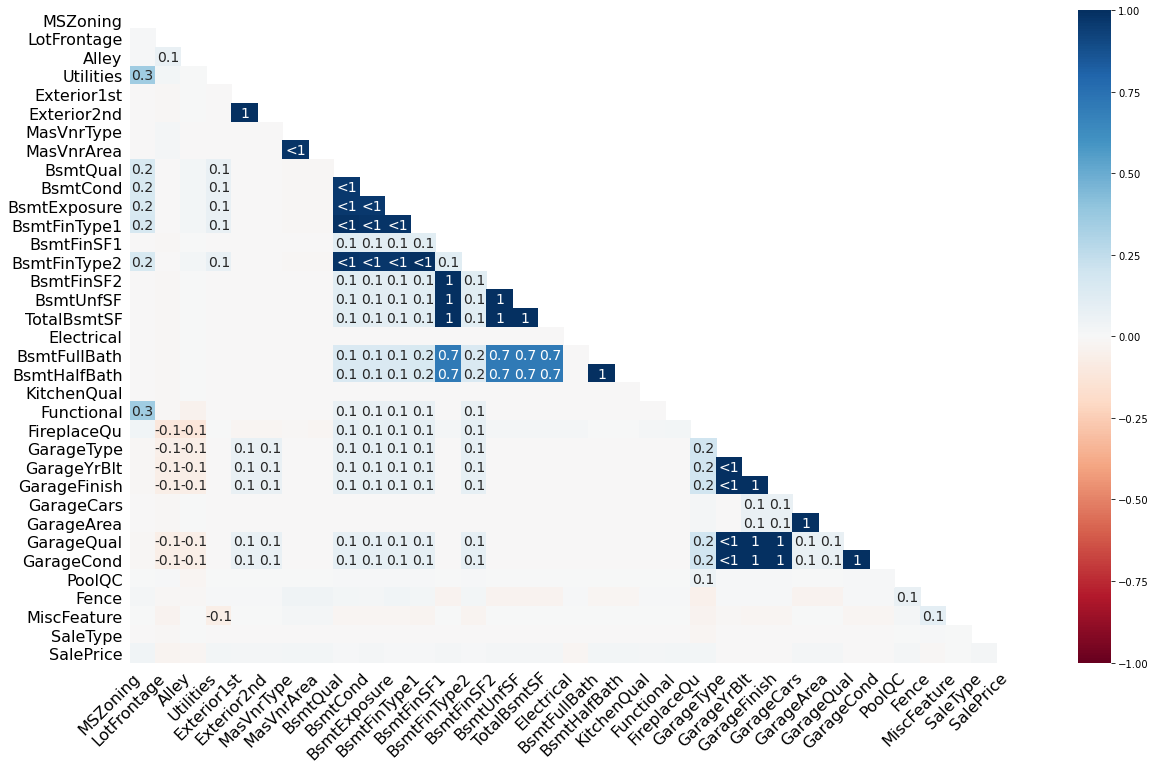

In [41]:
msno.heatmap(df)
plt.show()

Eksik veri içeren değişken sayısı: 34 

         Feature  Num_Missing  Missing_Ratio DataTypes
0         PoolQC         2909           1.00    object
1    MiscFeature         2814           0.96    object
2          Alley         2721           0.93    object
3          Fence         2348           0.80    object
5    FireplaceQu         1420           0.49    object
6    LotFrontage          486           0.17   float64
7   GarageFinish          159           0.05    object
8     GarageQual          159           0.05    object
9     GarageCond          159           0.05    object
10   GarageYrBlt          159           0.05   float64
11    GarageType          157           0.05    object
12  BsmtExposure           82           0.03    object
13      BsmtCond           82           0.03    object
14      BsmtQual           81           0.03    object
15  BsmtFinType2           80           0.03    object
16  BsmtFinType1           79           0.03    object
17    MasVnrType         

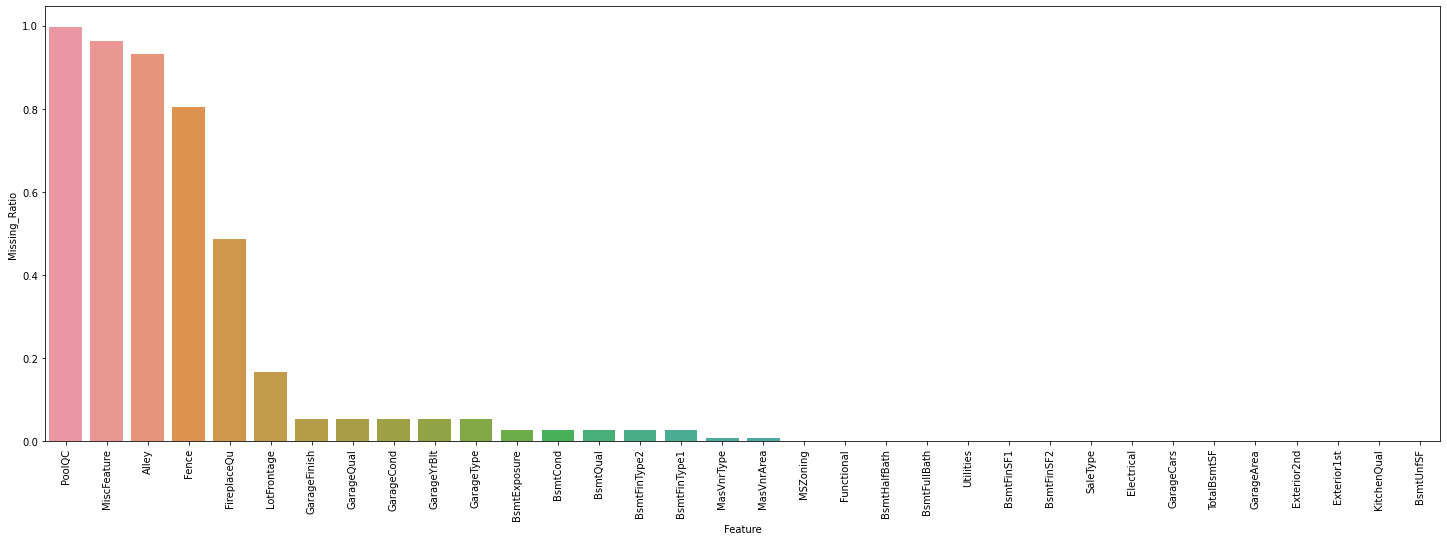

In [63]:
def missing_values(data, plot = False, target = "SalePrice"):
    
    mst = pd.DataFrame({"Num_Missing":data.isnull().sum(), 
                        "Missing_Ratio":data.isnull().sum() / data.shape[0]}).sort_values("Num_Missing", ascending = False)
    mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename({"index":"Feature"}, axis = 1)
    mst = mst[mst.Feature != target]
    
    print("Eksik veri içeren değişken sayısı:", mst.shape[0], "\n")
    
    if mst[mst.Missing_Ratio >= 1.0].shape[0] > 0:  
        print("Full Missing Variables:",mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(), axis = 1, inplace = True)

        print("Tam eksik değişkenler silinir!", "\n")

    if plot:
        plt.figure(figsize = (25, 8))    
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
            
            
    print(mst, "\n")        
    
missing_values(df, plot = True, target = "SalePrice")

In [68]:
cat_missing = ["Alley", 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Fence', "MiscFeature",
               "FireplaceQu", "GarageFinish","GarageCond", "GarageQual", "GarageType", "MasVnrType"]
for i in cat_missing:
    df[i] = np.where(df[i].isnull(), "None", df[i])
    
missing_values(df, plot = False, target = "SalePrice")

Eksik veri içeren değişken sayısı: 20 

         Feature  Num_Missing  Missing_Ratio DataTypes
0         PoolQC         2909           1.00    object
2    LotFrontage          486           0.17   float64
3    GarageYrBlt          159           0.05   float64
4     MasVnrArea           23           0.01   float64
5       MSZoning            4           0.00    object
6      Utilities            2           0.00    object
7   BsmtHalfBath            2           0.00   float64
8     Functional            2           0.00    object
9   BsmtFullBath            2           0.00   float64
10   Exterior1st            1           0.00    object
11    BsmtFinSF2            1           0.00   float64
12      SaleType            1           0.00    object
13    GarageCars            1           0.00   float64
14   Exterior2nd            1           0.00    object
15    BsmtFinSF1            1           0.00   float64
16    GarageArea            1           0.00   float64
17   KitchenQual         

In [69]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706.00,Unf,0.00,150.00,856.00,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00,0.00,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.00,RFn,2.00,548.00,TA,TA,Y,0,61,0,0,0,0,NaN,None,None,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00,Unf,0.00,284.00,1262.00,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00,1.00,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2.00,460.00,TA,TA,Y,298,0,0,0,0,0,NaN,None,None,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00,Unf,0.00,434.00,920.00,GasA,Ex,Y,SBrkr,920,866,0,1786,1.00,0.00,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2.00,608.00,TA,TA,Y,0,42,0,0,0,0,NaN,None,None,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00,Unf,0.00,540.00,756.00,GasA,Gd,Y,SBrkr,961,756,0,1717,1.00,0.00,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3.00,642.00,TA,TA,Y,0,35,272,0,0,0,NaN,None,None,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655.00,Unf,0.00,490.00,1145.00,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.00,0.00,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3.00,836.00,TA,TA,Y,192,84,0,0,0,0,NaN,None,None,0,12,2008,WD,Normal,250000.00


In [96]:
# GarageYrBlt değişkeninde gözlem NA ise YearBuilt değerini atayın.
df["GarageYrBlt"]= np.where((df.GarageYrBlt.isnull() == True) & (df.GarageArea == 0), df.YearBuilt,df.GarageYrBlt)

##### Kayıp-Eksik Veri Doldurma

In [101]:
def quick_missing_imp(data, num_method = "median", cat_length = 20, target = "SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    
    temp_target = data[target]
    
    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)
        
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
        
    data[target] = temp_target
    
    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")
        
    return data
        
df = quick_missing_imp(df, num_method = "median", cat_length = 17)

# BEFORE
SalePrice    1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

SalePrice    1459
dtype: int64 




#### 4) Ordinal Değişkenler

In [104]:
ordinal_vars = [
    "LotShape", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual",
    "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional",
    "FireplaceQu", "GarageQual", "GarageCond", "Fence", "Electrical"
]

def ordinal(serie, category):
    numeric = np.arange(1, len(category)+1, 1)
    zip_iterator = zip(category, numeric)
    mapping = dict(zip_iterator)
    serie = serie.map(mapping)
    return serie


def transform_ordinal(data, ordinal_vars, category):
    
    for i in ordinal_vars:
        data[i] = ordinal(data[i], category = category)
               
transform_ordinal(
    df, 
    ordinal_vars = ["ExterQual", "ExterCond", "HeatingQC","KitchenQual"],
    category = ["Po", "Fa", "TA", "Gd" ,"Ex"]
)

transform_ordinal(
    df, 
    ordinal_vars = ["BsmtQual", "BsmtCond", "FireplaceQu","GarageCond", "GarageQual"],
    category = ["None", "Po", "Fa", "TA", "Gd","Ex"]
)

transform_ordinal(
    df, 
    ordinal_vars = ["BsmtFinType1", "BsmtFinType2"],
    category = ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ","GLQ"]
)

# Different
df["LotShape"] = ordinal(df["LotShape"], category = ["IR3", "IR2", "IR1","Reg"])
df["BsmtExposure"] = ordinal(df["BsmtExposure"], category = ["None", "No", "Mn", "Av","Gd"])
df["Functional"] = ordinal(df["Functional"], category = ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1","Typ"])
df["Fence"] = ordinal(df["Fence"], category = ["None", "MnWw", "GdWo", "MnPrv","GdPrv"])

df["Electrical"] = ordinal(df["Electrical"], category = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'])

print("Ordinal transformation completed!")

Ordinal transformation completed!


In [105]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,None,nan,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,nan,nan,PConc,nan,nan,nan,nan,706.00,nan,0.00,150.00,856.00,GasA,nan,Y,nan,856,854,0,1710,1.00,0.00,2,1,3,1,nan,8,nan,0,nan,Attchd,2003.00,RFn,2.00,548.00,nan,nan,Y,0,61,0,0,0,0,Ex,nan,None,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,Pave,None,nan,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,nan,nan,CBlock,nan,nan,nan,nan,978.00,nan,0.00,284.00,1262.00,GasA,nan,Y,nan,1262,0,0,1262,0.00,1.00,2,0,3,1,nan,6,nan,1,nan,Attchd,1976.00,RFn,2.00,460.00,nan,nan,Y,298,0,0,0,0,0,Ex,nan,None,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,Pave,None,nan,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,nan,nan,PConc,nan,nan,nan,nan,486.00,nan,0.00,434.00,920.00,GasA,nan,Y,nan,920,866,0,1786,1.00,0.00,2,1,3,1,nan,6,nan,1,nan,Attchd,2001.00,RFn,2.00,608.00,nan,nan,Y,0,42,0,0,0,0,Ex,nan,None,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,Pave,None,nan,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,nan,nan,BrkTil,nan,nan,nan,nan,216.00,nan,0.00,540.00,756.00,GasA,nan,Y,nan,961,756,0,1717,1.00,0.00,1,0,3,1,nan,7,nan,1,nan,Detchd,1998.00,Unf,3.00,642.00,nan,nan,Y,0,35,272,0,0,0,Ex,nan,None,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,Pave,None,nan,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,nan,nan,PConc,nan,nan,nan,nan,655.00,nan,0.00,490.00,1145.00,GasA,nan,Y,nan,1145,1053,0,2198,1.00,0.00,2,1,4,1,nan,9,nan,1,nan,Attchd,2000.00,RFn,3.00,836.00,nan,nan,Y,192,84,0,0,0,0,Ex,nan,None,0,12,2008,WD,Normal,250000.00


##### Korelasyon

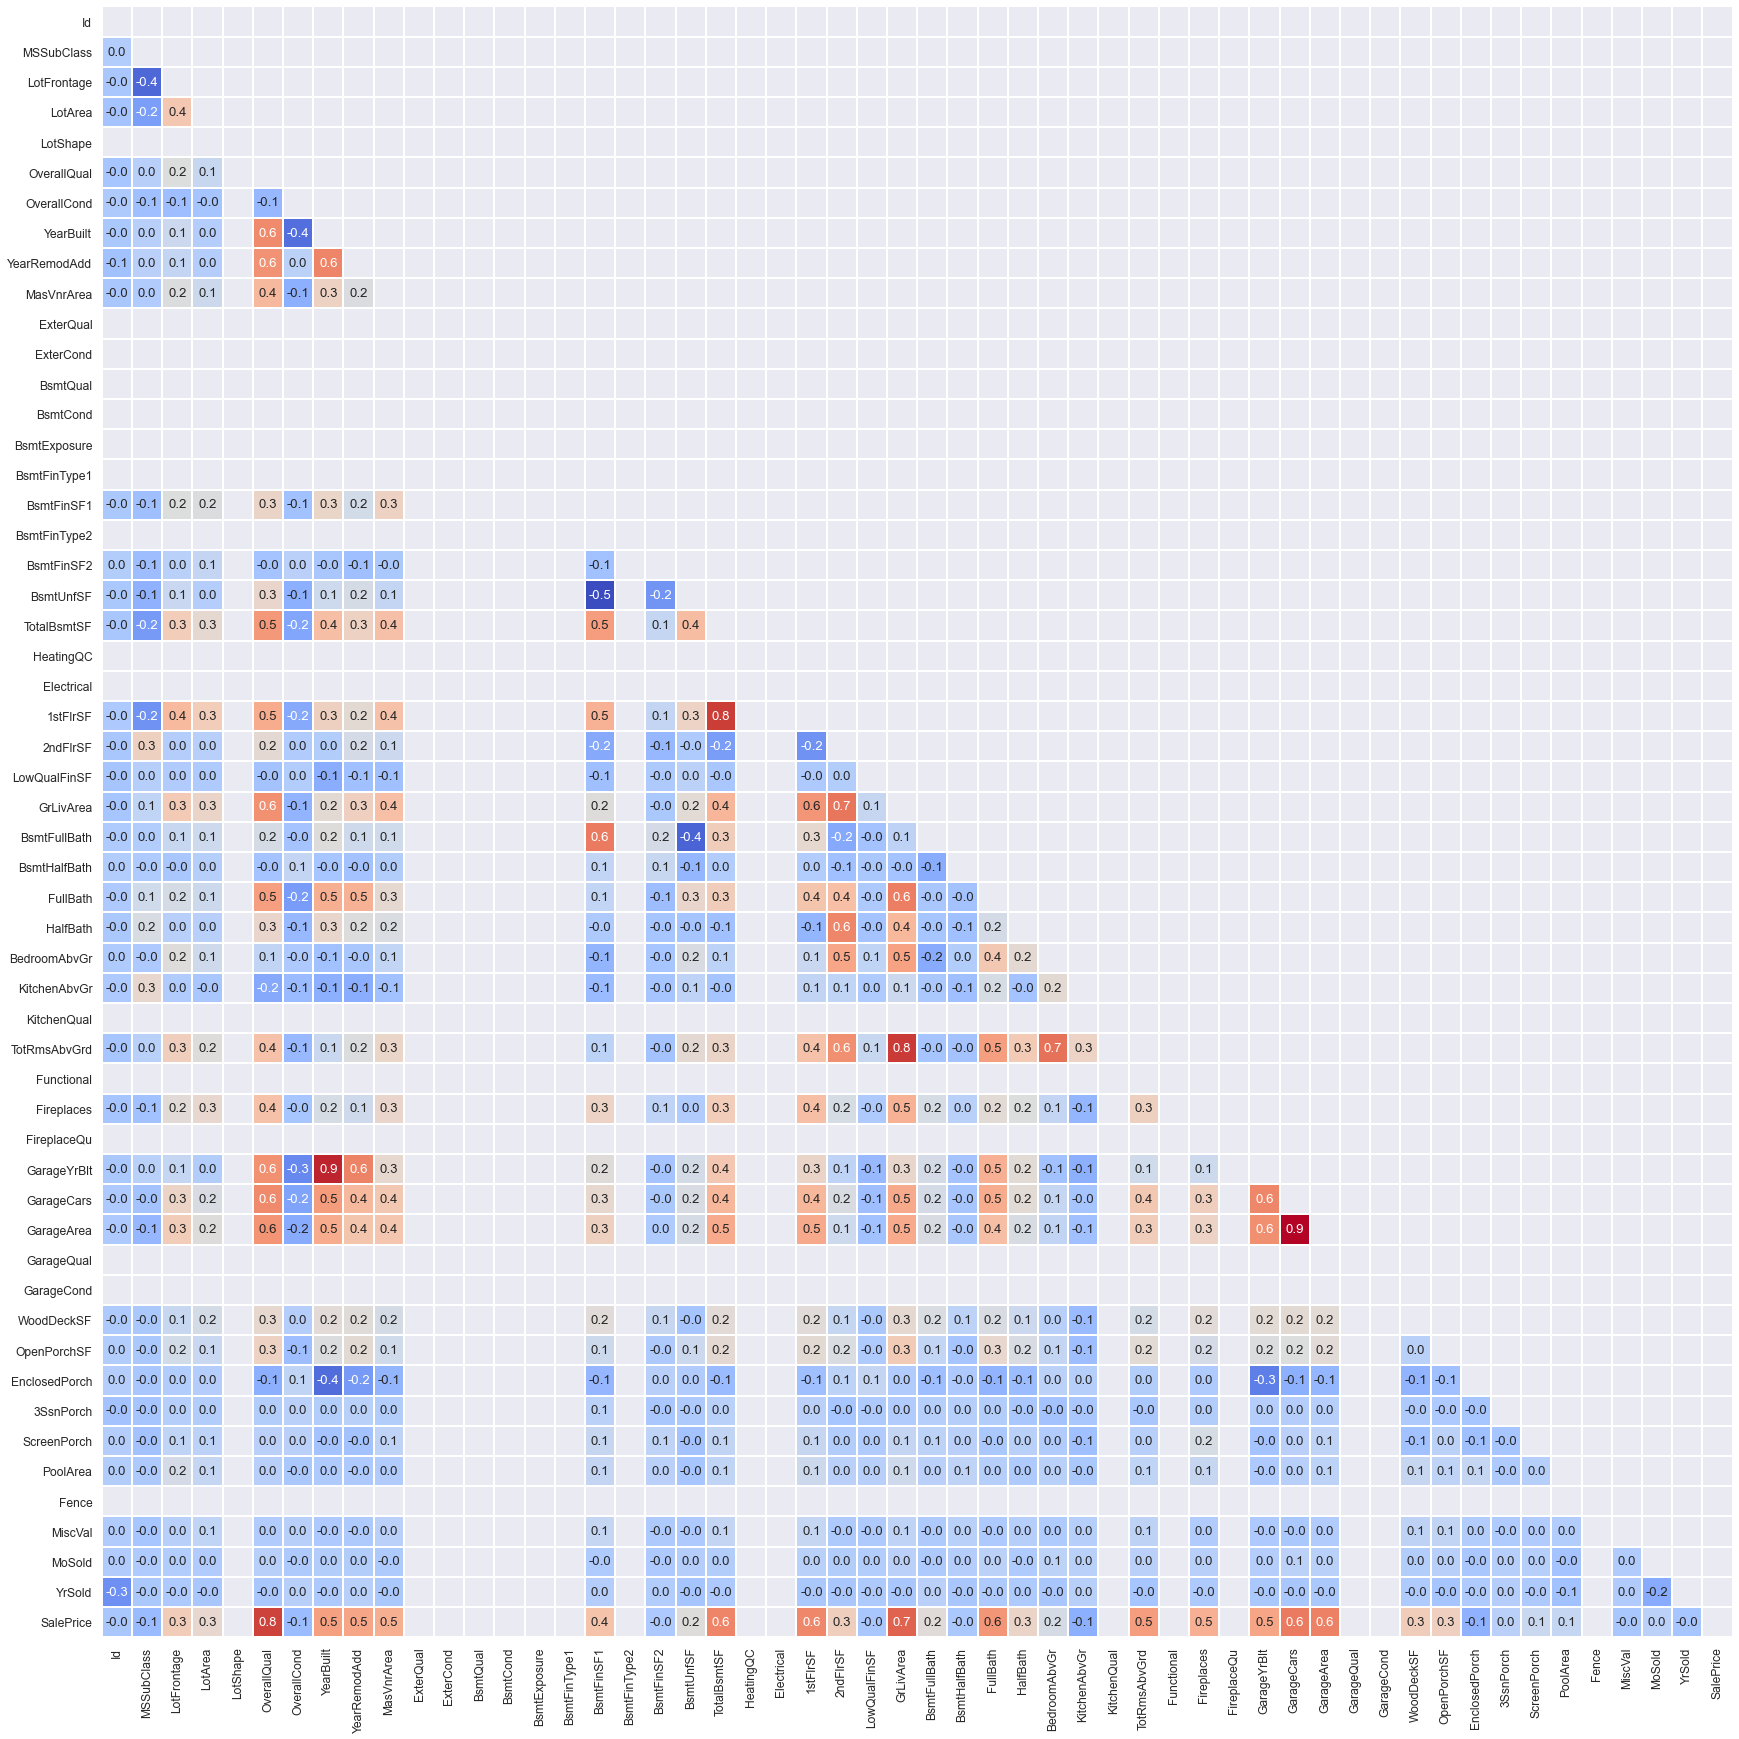

In [108]:
sns.set(font_scale=1.1)
c = df.corr()
mask = np.triu(c.corr())
plt.figure(figsize=(30, 30))
sns.heatmap(c,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

In [109]:
# BASİT KORELASYON ANALİZİ

##################################
###### CORRELATION ANALYSIS ######
################################## 


DEPENDENT VARIABLES
----------------------------------
       Variables  Cor
0    OverallQual 0.79
1      GrLivArea 0.71
2     GarageCars 0.64
3     GarageArea 0.62
4    TotalBsmtSF 0.61
5       1stFlrSF 0.61
6       FullBath 0.56
7   TotRmsAbvGrd 0.53
8      YearBuilt 0.52
9    GarageYrBlt 0.51
10  YearRemodAdd 0.51 


Highly Correlated Variables: 
 ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd'] 


INDEPENDENT VARIABLES
----------------------------------
GrLivArea :
      Variables  Cor
0  TotRmsAbvGrd 0.81 


GarageCars :
    Variables  Cor
0  GarageArea 0.89 


GarageArea :
    Variables  Cor
0  GarageCars 0.89 


TotalBsmtSF :
  Variables  Cor
0  1stFlrSF 0.80 


1stFlrSF :
     Variables  Cor
0  TotalBsmtSF 0.80 


TotRmsAbvGrd :
   Variables  Cor
0  GrLivArea 0.81 



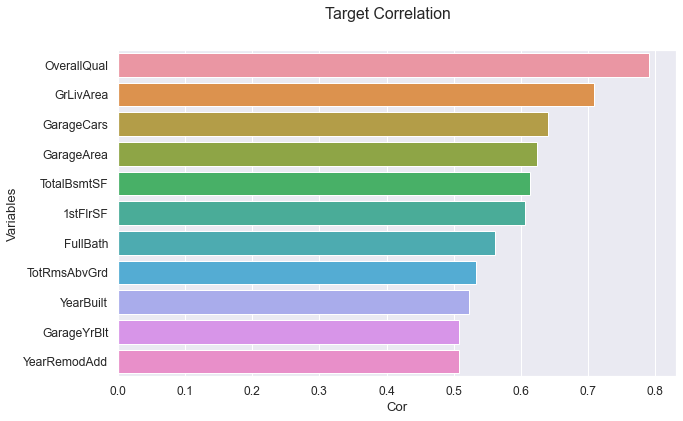

In [110]:
def find_linear(data, target, plot = False):

    c = data.corr()
    temp = c[target].sort_values(ascending = False).reset_index()
    temp = temp[temp["index"] != target]
    temp.columns = ["Variables", "Cor"]
    
    highly = temp[(temp["Cor"] > 0.5) | (temp["Cor"] < -0.5)].reset_index(drop = True)
    
    print("##################################")
    print("###### CORRELATION ANALYSIS ######")
    print("##################################", "\n\n")
    
    print("DEPENDENT VARIABLES")
    print("----------------------------------")
    print(highly, "\n\n")
    
    print("Highly Correlated Variables: \n", highly["Variables"].tolist(), "\n\n")
    
    
    print("INDEPENDENT VARIABLES")
    print("----------------------------------")
    for i in highly.Variables:
        c2 = c[i].sort_values(ascending = False).reset_index()
        c2 = c2[~c2["index"].isin([i,target])]
        c2.columns = ["Variables", "Cor"]
    
        cwith = c2[(c2["Cor"] >= 0.8) | (c2["Cor"] <= -0.8)].reset_index(drop = True)
        if len(cwith) > 0:
            print(i,":")
            print(cwith, "\n\n")
            
    if plot:       
        plt.figure(figsize = (10, 6))  
        p = sns.barplot(highly.Cor, highly["Variables"])
        plt.suptitle("Target Correlation")
            
find_linear(df, target = "SalePrice", plot = True)

#### 5) Sayısal Değişkenler

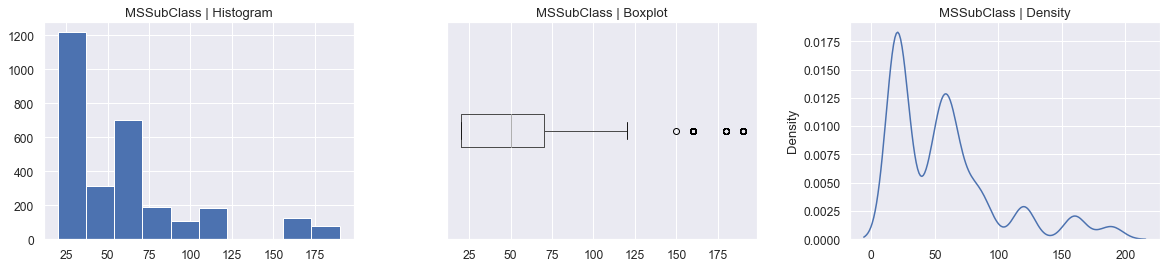

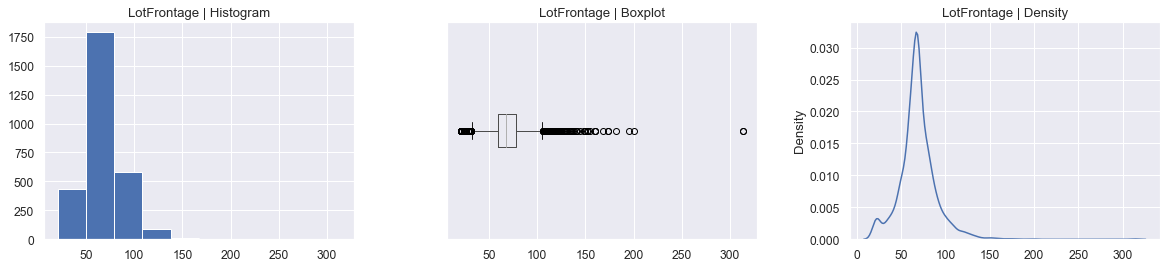

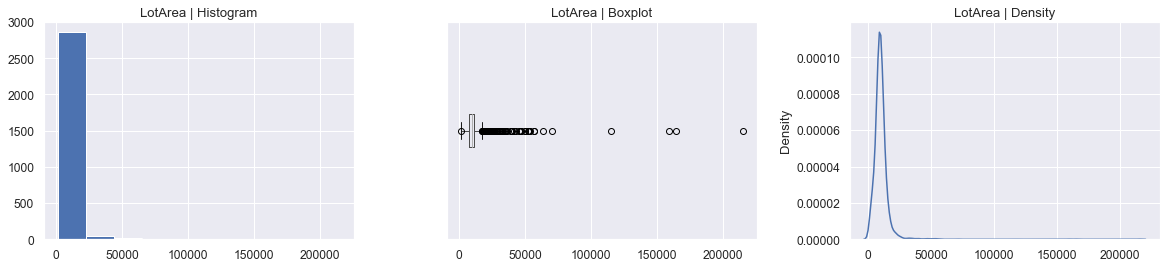

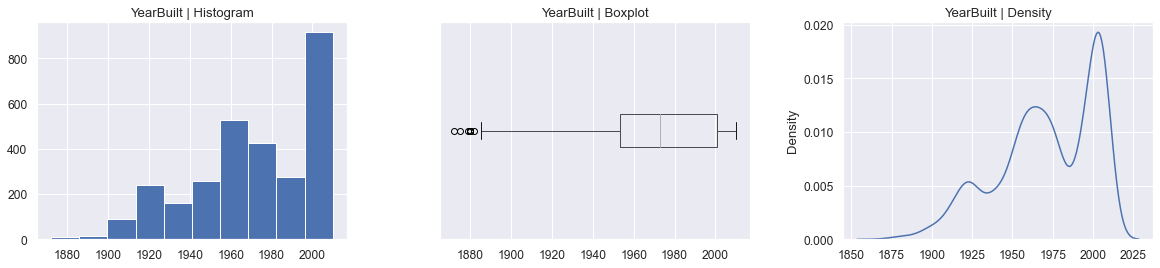

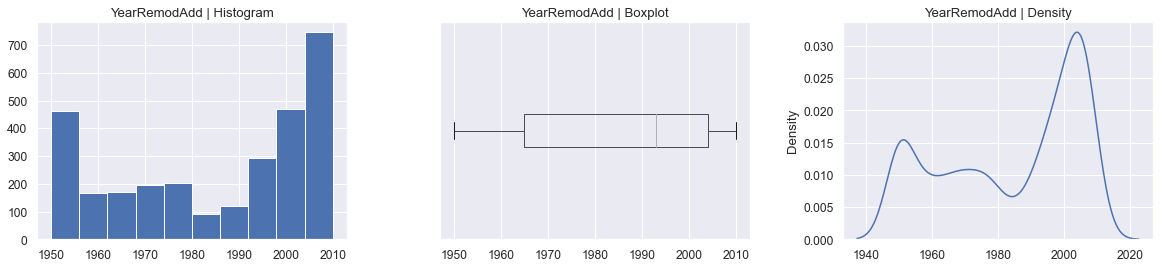

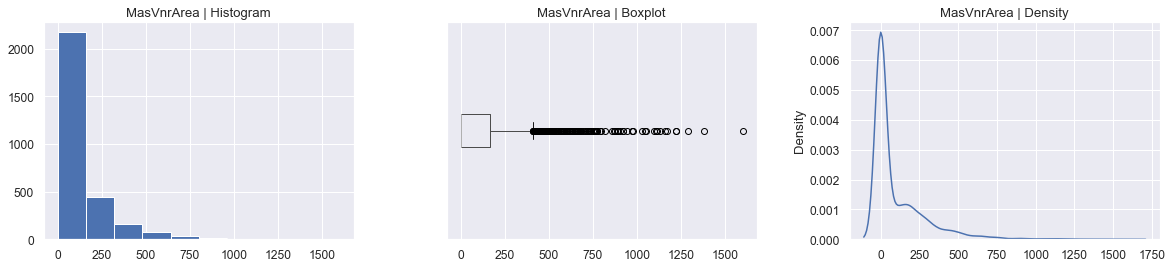

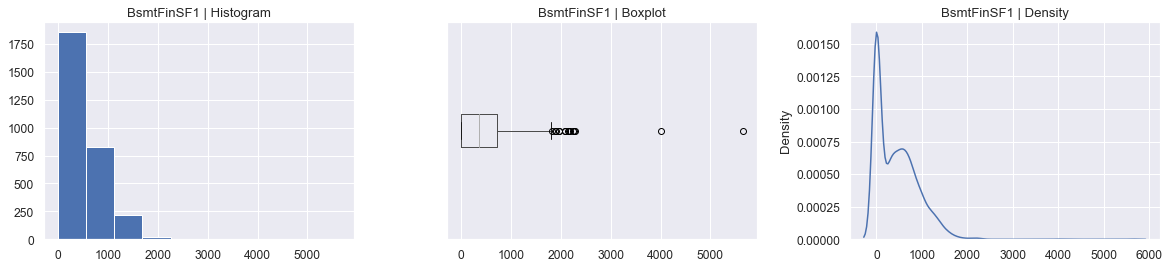

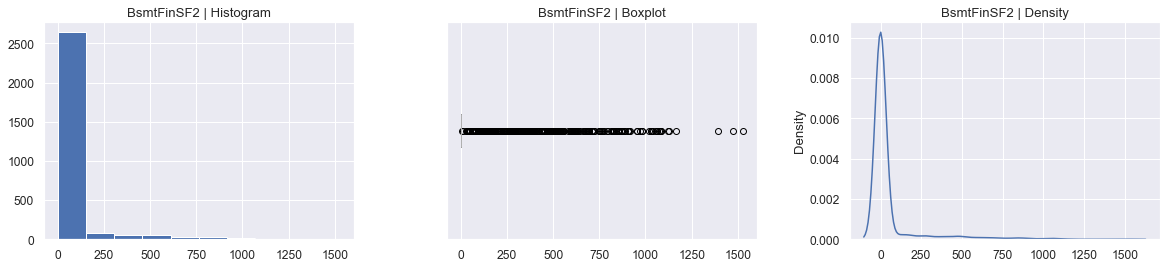

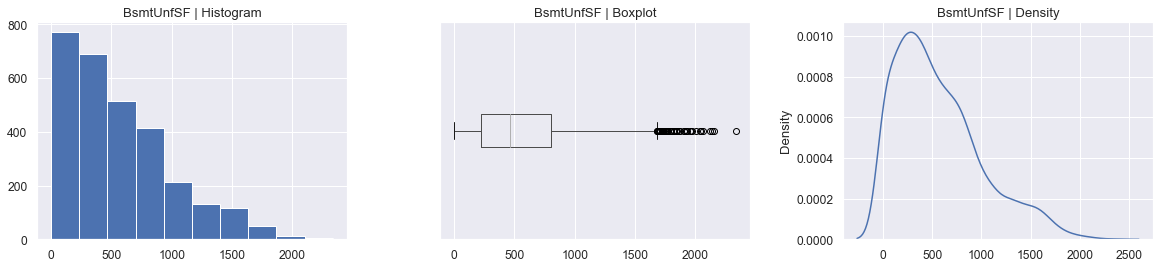

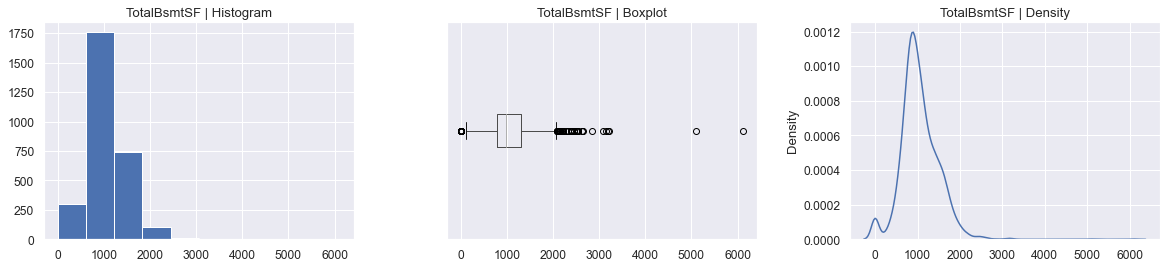

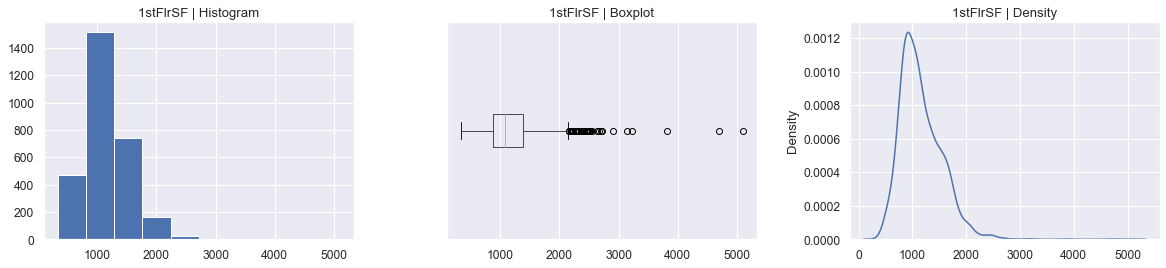

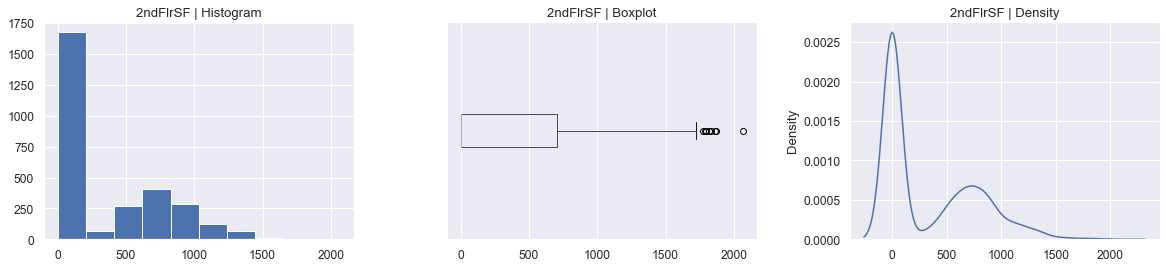

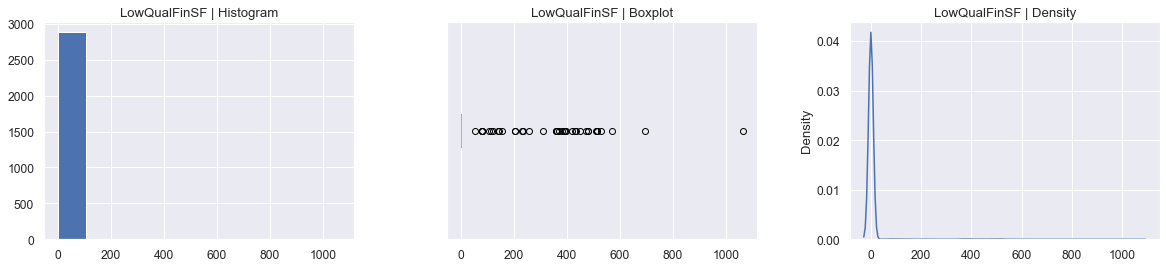

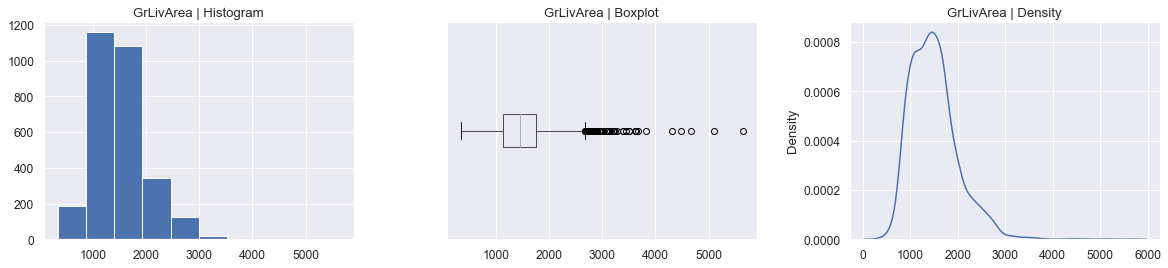

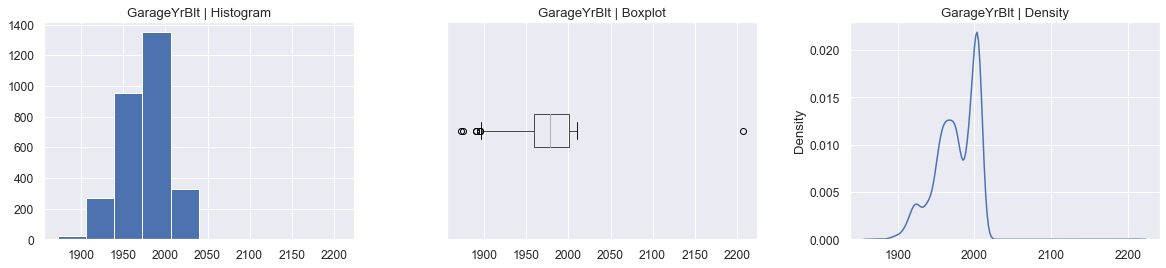

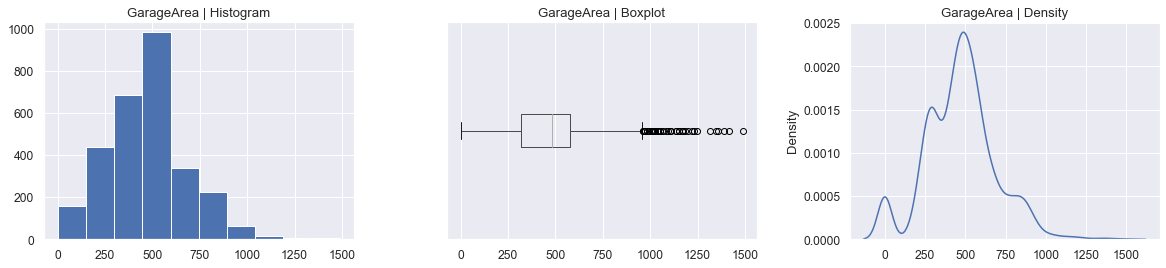

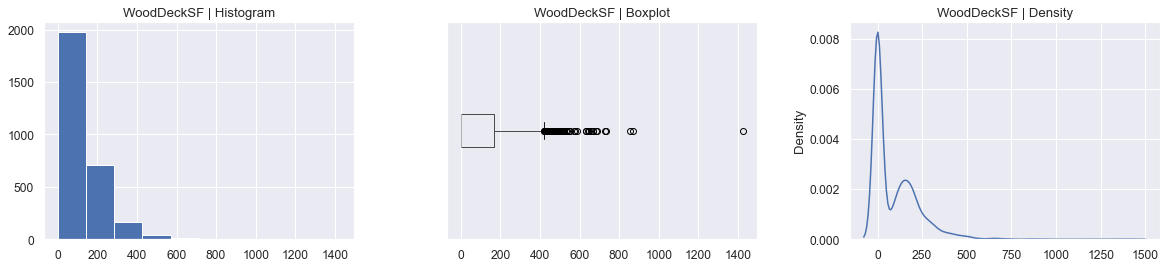

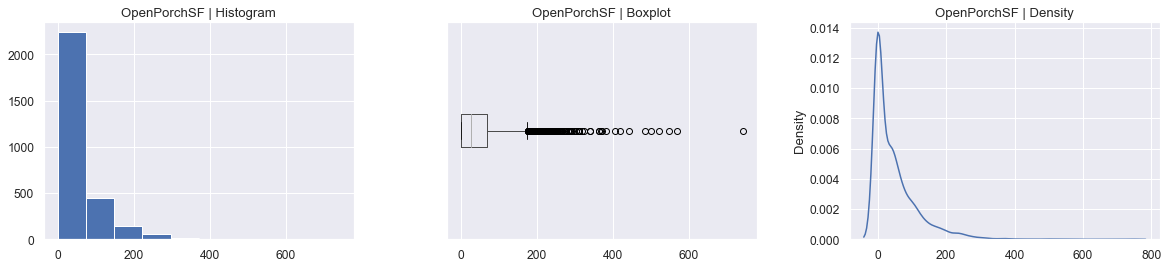

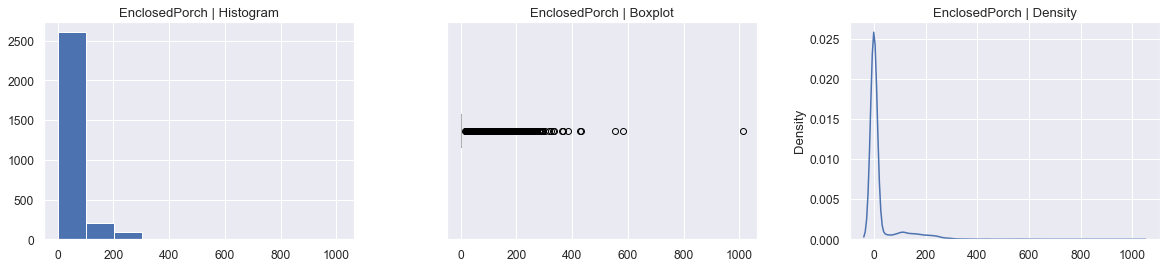

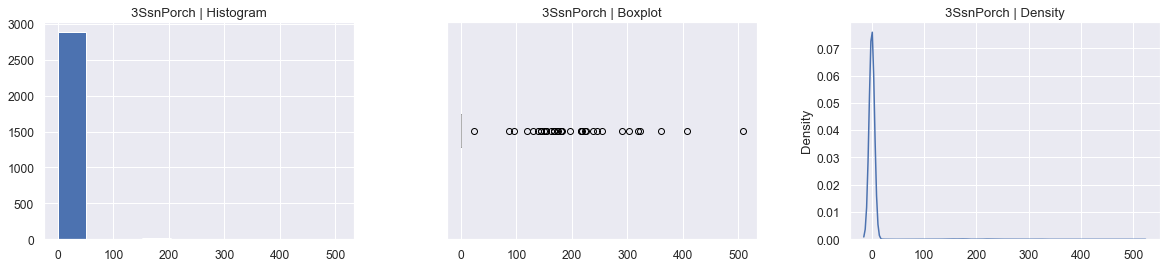

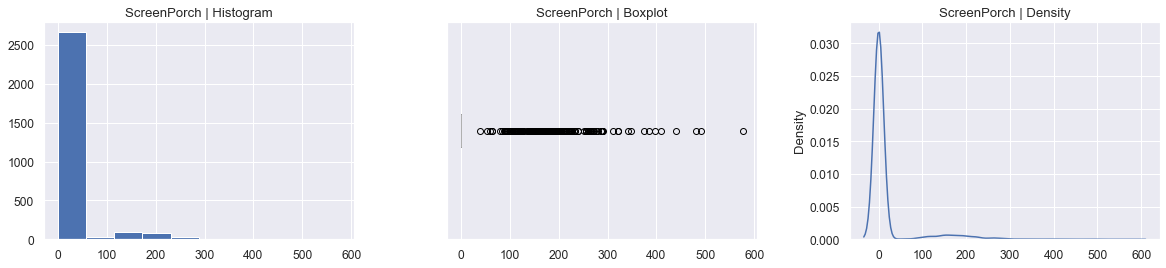

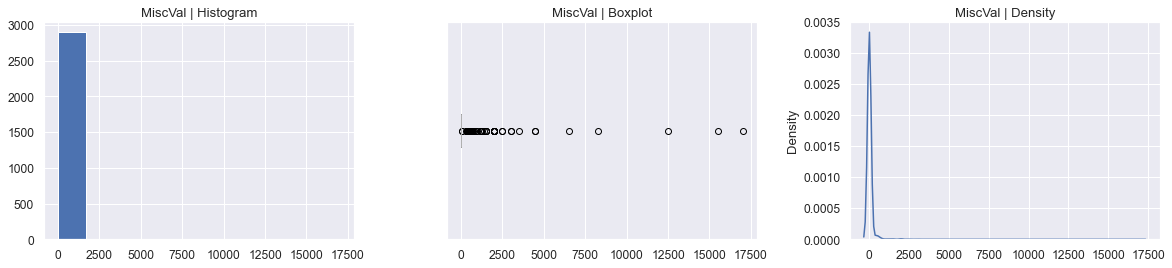

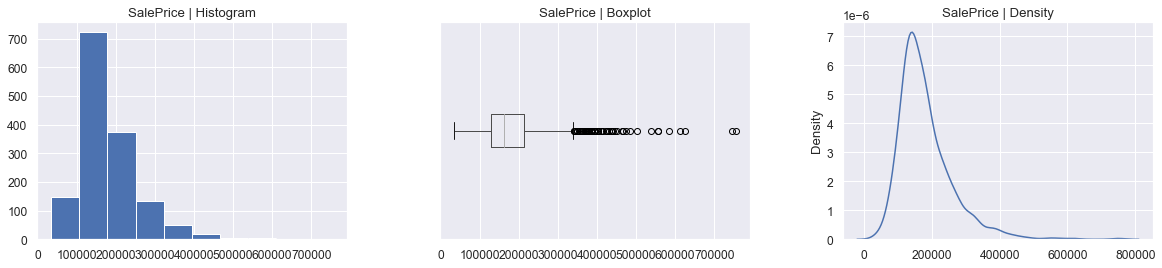

In [111]:
def num_plot(data, cat_length = 10, remove = ["Id"], hist_bins = 10, figsize = (20,4)):
    
    num_cols = [col for col in data.columns if data[col].dtypes != "O" 
                and len(data[col].unique()) >= cat_length]
    
    if len(remove) > 0:
        num_cols = [x for x in num_cols if (x not in remove)]
           
    for i in num_cols:
        fig, axes = plt.subplots(1, 3, figsize = figsize)
        data.hist(str(i), bins = hist_bins, ax=axes[0])
        data.boxplot(str(i),  ax=axes[1], vert=False);
        try: 
            sns.kdeplot(np.array(data[str(i)]))
        except: ValueError
        
        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()
        
        
num_plot(df.drop(ordinal_vars, axis = 1), cat_length = 16, remove = ["Id"], hist_bins = 10, figsize = (20,4))

#### 6) Kategorik Değişkenler

In [112]:
for i in ["Street", "Utilities", "LandSlope", "MiscFeature"]:
    print(df[i].value_counts())

Pave    2907
Grvl      12
Name: Street, dtype: int64
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64


In [113]:
def cat_eda(data, cat_length, target = "SalePrice"):  
    dataframe = data.copy()
    
    #if len(ordinal_variable) > 0:
    #    dataframe.drop(ordinal_variable, axis = 1, inplace = True)
        
    more_cat_cols = [col for col in dataframe.columns if len(dataframe[col].unique()) < cat_length]
    
    for i in more_cat_cols: 
        print(i, ":", len(dataframe[i].value_counts()), "Unique Category -", str(dataframe[i].dtype))
        print(pd.DataFrame({"COUNT": dataframe[i].value_counts(),
                            "RATIO": dataframe[i].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(i)[target].median(),
                            "TARGET_COUNT": dataframe.groupby(i)[target].count(),
                            "TARGET_STD": dataframe.groupby(i)[target].std()}), end="\n\n\n")
    
    print("# DTYPES -----------------------------")
    print("Object Variables:",dataframe[more_cat_cols].select_dtypes("object").columns.tolist(), "\n")
    print("Integer Variables:",dataframe[more_cat_cols].select_dtypes("integer").columns.tolist(), "\n")
    print("Float Variables:",dataframe[more_cat_cols].select_dtypes("float").columns.tolist(), "\n")

cat_eda(df, cat_length=17)

MSSubClass : 16 Unique Category - int64
     COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
20    1079   0.37      159250.00           536    78782.19
30     139   0.05       99900.00            69    24857.11
40       6   0.00      142500.00             4    75747.80
45      18   0.01      107500.00            12    20231.72
50     287   0.10      132000.00           144    54851.98
60     575   0.20      215200.00           299    86579.91
70     128   0.04      156000.00            60    58206.55
75      23   0.01      163500.00            16   100556.76
80     118   0.04      166500.00            58    38197.81
85      48   0.02      140750.00            20    19629.94
90     109   0.04      135980.00            52    27833.25
120    182   0.06      192000.00            87    58221.49
150      1   0.00            nan             0         nan
160    128   0.04      146000.00            63    34587.54
180     17   0.01       88500.00            10    29474.28
190     61   0.0

In [ ]:
# İşe yaramayan değişkenkeri siliyoruz.
drop_list = ["Street", "Utilities", "LandSlope", "MiscFeature", "PoolArea"]


for col in drop_list:
    df.drop(col, axis=1, inplace=True)

#### 8) Özellik İşlemleri

In [116]:
df2 = df.copy()
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,None,nan,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,nan,nan,PConc,nan,nan,nan,nan,706.00,nan,0.00,150.00,856.00,GasA,nan,Y,nan,856,854,0,1710,1.00,0.00,2,1,3,1,nan,8,nan,0,nan,Attchd,2003.00,RFn,2.00,548.00,nan,nan,Y,0,61,0,0,0,Ex,nan,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,None,nan,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,nan,nan,CBlock,nan,nan,nan,nan,978.00,nan,0.00,284.00,1262.00,GasA,nan,Y,nan,1262,0,0,1262,0.00,1.00,2,0,3,1,nan,6,nan,1,nan,Attchd,1976.00,RFn,2.00,460.00,nan,nan,Y,298,0,0,0,0,Ex,nan,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,None,nan,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,nan,nan,PConc,nan,nan,nan,nan,486.00,nan,0.00,434.00,920.00,GasA,nan,Y,nan,920,866,0,1786,1.00,0.00,2,1,3,1,nan,6,nan,1,nan,Attchd,2001.00,RFn,2.00,608.00,nan,nan,Y,0,42,0,0,0,Ex,nan,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,None,nan,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,nan,nan,BrkTil,nan,nan,nan,nan,216.00,nan,0.00,540.00,756.00,GasA,nan,Y,nan,961,756,0,1717,1.00,0.00,1,0,3,1,nan,7,nan,1,nan,Detchd,1998.00,Unf,3.00,642.00,nan,nan,Y,0,35,272,0,0,Ex,nan,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,None,nan,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,nan,nan,PConc,nan,nan,nan,nan,655.00,nan,0.00,490.00,1145.00,GasA,nan,Y,nan,1145,1053,0,2198,1.00,0.00,2,1,4,1,nan,9,nan,1,nan,Attchd,2000.00,RFn,3.00,836.00,nan,nan,Y,192,84,0,0,0,Ex,nan,0,12,2008,WD,Normal,250000.00


In [117]:
df2["TotalQual"] = df2[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1", 
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1)
df2["BsmtQual"] = df2[["BsmtCond", "BsmtFinType1", "BsmtFinType2"]].sum(axis = 1)
df2["TotalGarageQual"] = df2[["GarageQual", "GarageCond"]].sum(axis = 1)
df2["Overall"] = df2[["OverallQual", "OverallCond"]].sum(axis = 1)
df2["Exter"] = df2[["ExterQual", "ExterCond"]].sum(axis = 1)
df2["ExtraQual"] = df2[["Fence", "FireplaceQu", "Functional", "HeatingQC"]].sum(axis = 1)
df2["Qual"] = df2[["OverallQual", "ExterQual", "GarageQual", "Fence", "BsmtFinType1", "BsmtFinType2", "KitchenQual", "FireplaceQu"]].sum(axis = 1)
df2["Cond"] = df2[["OverallCond", "ExterCond", "GarageCond", "BsmtCond", "HeatingQC", "Functional"]].sum(axis = 1)

In [118]:
cat_eda(df2[ordinal_vars+["SalePrice"]], cat_length=17)

LotShape : 0 Unique Category - float64
Empty DataFrame
Columns: [COUNT, RATIO, TARGET_MEDIAN, TARGET_COUNT, TARGET_STD]
Index: []


OverallQual : 10 Unique Category - int64
    COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
1       4   0.00       50150.00             2    15344.22
2      13   0.00       60000.00             3    14254.20
3      40   0.01       86250.00            20    24688.57
4     226   0.08      108000.00           116    29022.00
5     825   0.28      133000.00           397    27107.33
6     731   0.25      160000.00           374    36090.18
7     600   0.21      200141.00           319    44466.26
8     342   0.12      269750.00           168    63898.90
9     107   0.04      345000.00            43    81278.17
10     31   0.01      432390.00            18   159785.49


OverallCond : 9 Unique Category - int64
   COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
1      7   0.00       61000.00             1         nan
2     10   0.00       85000.00   

In [119]:
df2["LotShape"] = np.where(df2.LotShape == 1, 2, df2["LotShape"])

df2["OverallQual"] = np.where(df2.OverallQual.isin([1,2]), 3, df2["OverallQual"])

df2["OverallCond"] = np.where(df2.OverallCond.isin([1,2]), 3, df2["OverallCond"])
df2["OverallCond"] = np.where(df2.OverallCond.isin([7,8]), 6, df2["OverallCond"])

df2["ExterCond"] = np.where(df2.ExterCond.isin([1,2]), 0, 1)

df2["BsmtQual"] = np.where(df2.BsmtQual.isin([3,6]), 7, df2["BsmtQual"])
df2["BsmtQual"] = np.where(df2.BsmtQual.isin([17,18]), 16, df2["BsmtQual"])
df2["BsmtQual"] = np.where(df2.BsmtQual.isin([9,10,11]), 12, df2["BsmtQual"])

df2["BsmtCond"] = np.where(df2.BsmtCond == 1, 2, df2["BsmtCond"])

df2["HeatingQC"] = np.where(df2.HeatingQC == 1, 2, df2["HeatingQC"])

df2["Functional"] = np.where(df2.Functional == 8, 1, 0)

df2["GarageQual"] = np.where(df2.GarageQual == 1, 2, df2["GarageQual"])
df2["GarageQual"] = np.where(df2.GarageQual == 6, 5, df2["GarageQual"])

df2["GarageCond"] = np.where(df2.GarageCond == 1, 2, df2["GarageCond"])
df2["GarageCond"] = np.where(df2.GarageCond == 6, 5, df2["GarageCond"])

df2["Fence"] = np.where(df2.Fence.isin([2,4]), 3, df2["Fence"])

df2["Electrical"] = np.where(df2["Electrical"].isin([5, 4]), 3, df2["Electrical"])

In [120]:
cat_eda(df2[ordinal_vars+["SalePrice"]], cat_length=17)

LotShape : 0 Unique Category - float64
Empty DataFrame
Columns: [COUNT, RATIO, TARGET_MEDIAN, TARGET_COUNT, TARGET_STD]
Index: []


OverallQual : 8 Unique Category - int64
    COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
3      57   0.02       81000.00            25    27012.10
4     226   0.08      108000.00           116    29022.00
5     825   0.28      133000.00           397    27107.33
6     731   0.25      160000.00           374    36090.18
7     600   0.21      200141.00           319    44466.26
8     342   0.12      269750.00           168    63898.90
9     107   0.04      345000.00            43    81278.17
10     31   0.01      432390.00            18   159785.49


OverallCond : 5 Unique Category - int64
   COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
3     67   0.02       85000.00            31    67594.85
4    101   0.03      115000.00            57    38922.53
5   1645   0.56      185000.00           821    85117.32
6   1065   0.36      143750.00      

In [121]:
# Total Floor
df2["TotalFlrSF"] = df2["1stFlrSF"] + df2["2ndFlrSF"]

# Total Finished Basement Area
df2["TotalBsmtFin"] = df2.BsmtFinSF1+df2.BsmtFinSF2

df2["BsmtFinRatio"] = (df2.TotalBsmtFin / df2.TotalBsmtSF).fillna(0)

# Is there a basement?
df2["Basement"] = np.where(df2.TotalBsmtSF < 1 , 0, 1)

# Porch Area
df2["PorchArea"] = df2.OpenPorchSF + df2.EnclosedPorch + df2.ScreenPorch + df2["3SsnPorch"] + df2.WoodDeckSF

# Total House Area
df2["TotalHouseArea"] = df2.TotalFlrSF + df2.TotalBsmtSF

df2["TotalSqFeet"] = df2.GrLivArea + df2.TotalBsmtSF


# Basement Rooms
df2["BsmtRoom"] = np.where((df2.BsmtFinSF1 > 0) & (df2.BsmtFinSF2 < 1), 1, np.nan)
df2["BsmtRoom"] = np.where((df2.BsmtFinSF1 < 1) & (df2.BsmtFinSF2 > 0 ), 1, df2["BsmtRoom"])
df2["BsmtRoom"] = np.where((df2.BsmtFinSF1 < 1) & (df2.BsmtFinSF2 < 1 ), 0, df2["BsmtRoom"])
df2["BsmtRoom"] = np.where((df2.BsmtFinSF1 > 0) & (df2.BsmtFinSF2 > 0 ), 2, df2["BsmtRoom"])


# Floor
df2["Floor"] = np.where((df2["2ndFlrSF"] < 1), 1, 2)


# Bath Room
df2["FullBath"] = np.where(df2.FullBath == 4, 3, df2.FullBath)
df2["BsmtFullBath"] = np.where(df2.BsmtFullBath == 3, 2, df2.BsmtFullBath)

df2["TotalFullBath"] = df2.BsmtFullBath + df2.FullBath
df2["TotalHalfBath"] = df2.BsmtHalfBath + df2.HalfBath

df2["TotalBath"] = df2["TotalFullBath"] + (df2["TotalHalfBath"]*0.5)
df2["TotalBath"] = np.where(df2.TotalBath.isin([6,7]), 5, df2.TotalBath)

# Fireplace
df2["Fireplaces"] = np.where(df2.Fireplaces > 3, 3, df2.Fireplaces)

# Garage
df2["GarageAreaRatio"] = (df2.GarageArea / df2.GarageCars).fillna(0)
df2["GarageCars"] = np.where(df2.GarageCars > 3, 3, df2.GarageCars)

# Rooms
df2["TotRmsAbvGrd"] = np.where(df2.TotRmsAbvGrd > 12, 12, df2.TotRmsAbvGrd)
df2["TotRmsAbvGrd"] = np.where(df2.TotRmsAbvGrd == 2, 3, df2.TotRmsAbvGrd)

# Lot Ratio
df2["LotRatio"] = df2.GrLivArea / df2.LotArea

df2["RatioArea"] = df2.TotalHouseArea / df2.LotArea

df2["GarageLotRatio"] = df2.GarageArea / df2.LotArea

# MasVnrArea
df2["MasVnrRatio"] = df2.MasVnrArea / df2.TotalHouseArea

# Dif Area
df2["DifArea"] = (df2.LotArea - df2["1stFlrSF"] - df2.GarageArea - df2.PorchArea - df2.WoodDeckSF)

# LowQualFinSF
df2["LowQualFinSFRatio"] = df2.LowQualFinSF / df2.TotalHouseArea



df2["OverallGrade"] = df2["OverallQual"] * df2["OverallCond"]
# Overall quality of the garage
df2["GarageGrade"] = df2["GarageQual"] * df2["GarageCond"]
# Overall quality of the exterior
df2["ExterGrade"] = df2["ExterQual"] * df2["ExterCond"]
# Overall kitchen score
df2["KitchenScore"] = df2["KitchenAbvGr"] * df2["KitchenQual"]
# Overall fireplace score
df2["FireplaceScore"] = df2["Fireplaces"] * df2["FireplaceQu"]


df2["HasMasVnrType"] = np.where(df2.MasVnrType == "None", 0, 1)
df2["BoughtOffPlan"] = np.where(df2.SaleCondition == "Partial", 1, 0)

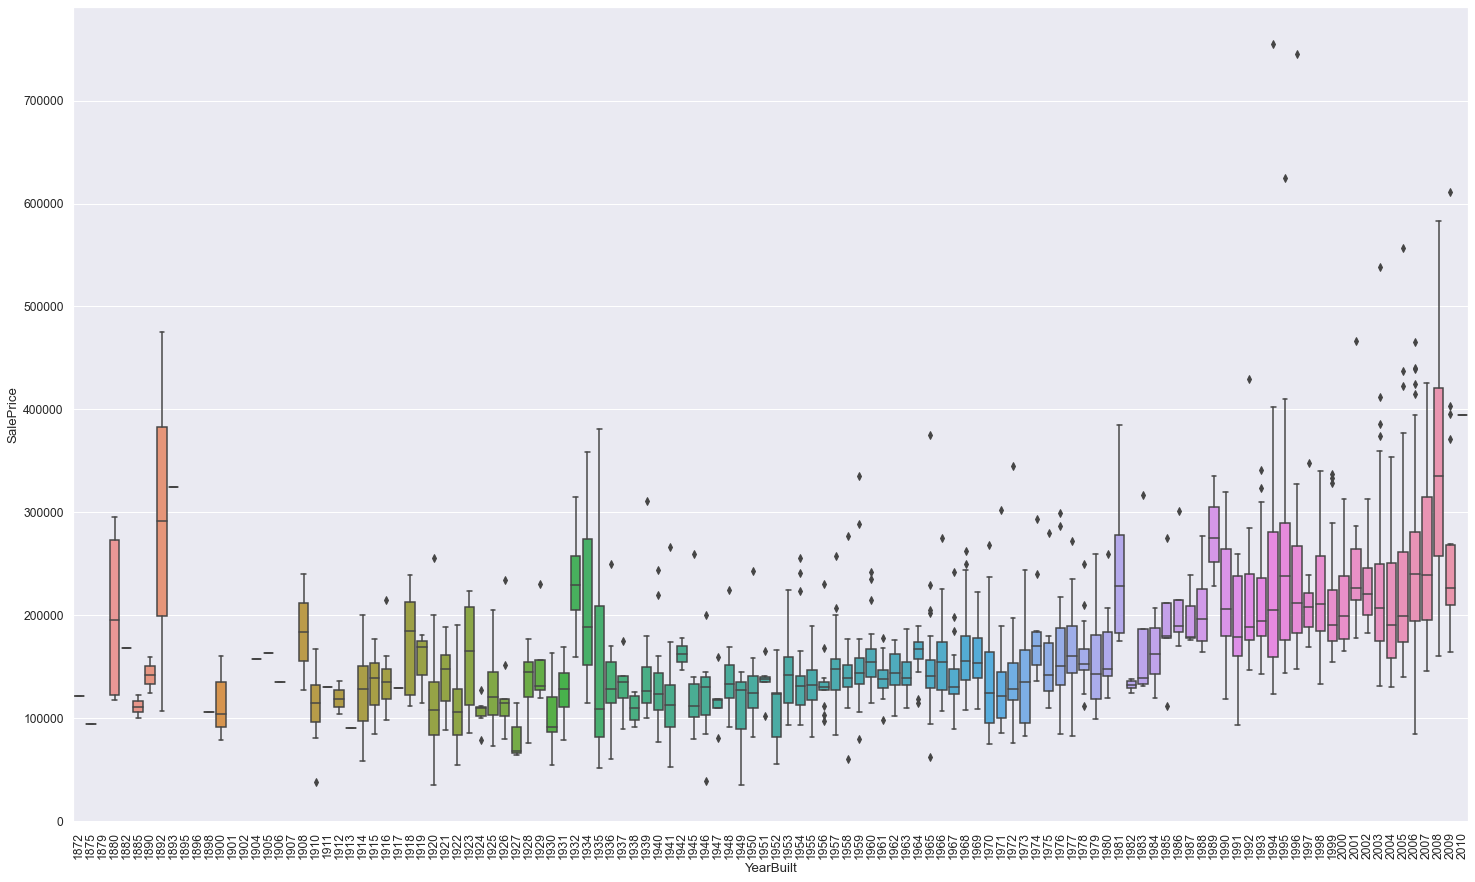

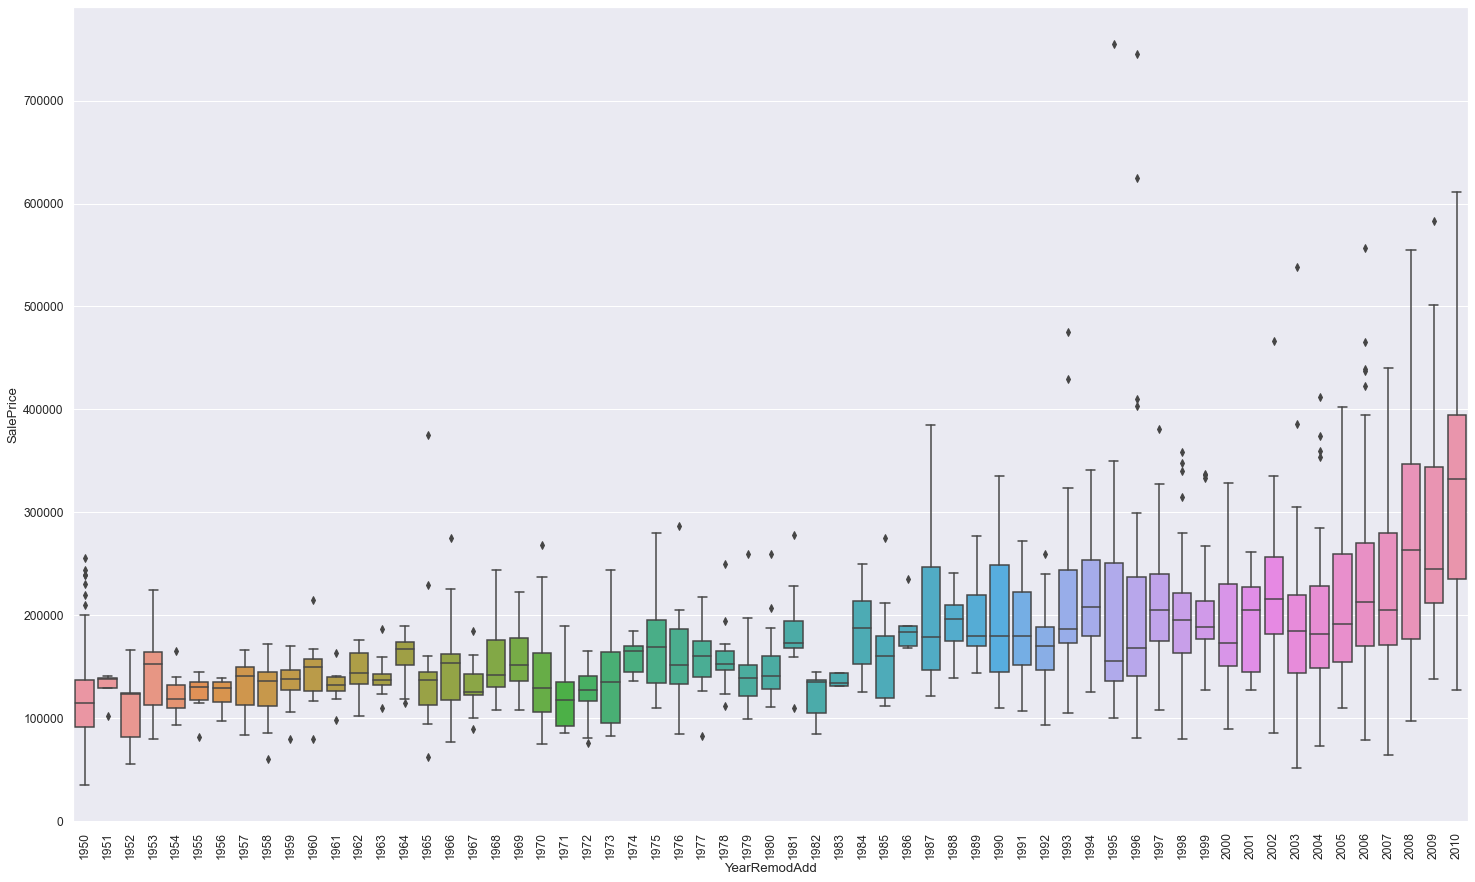

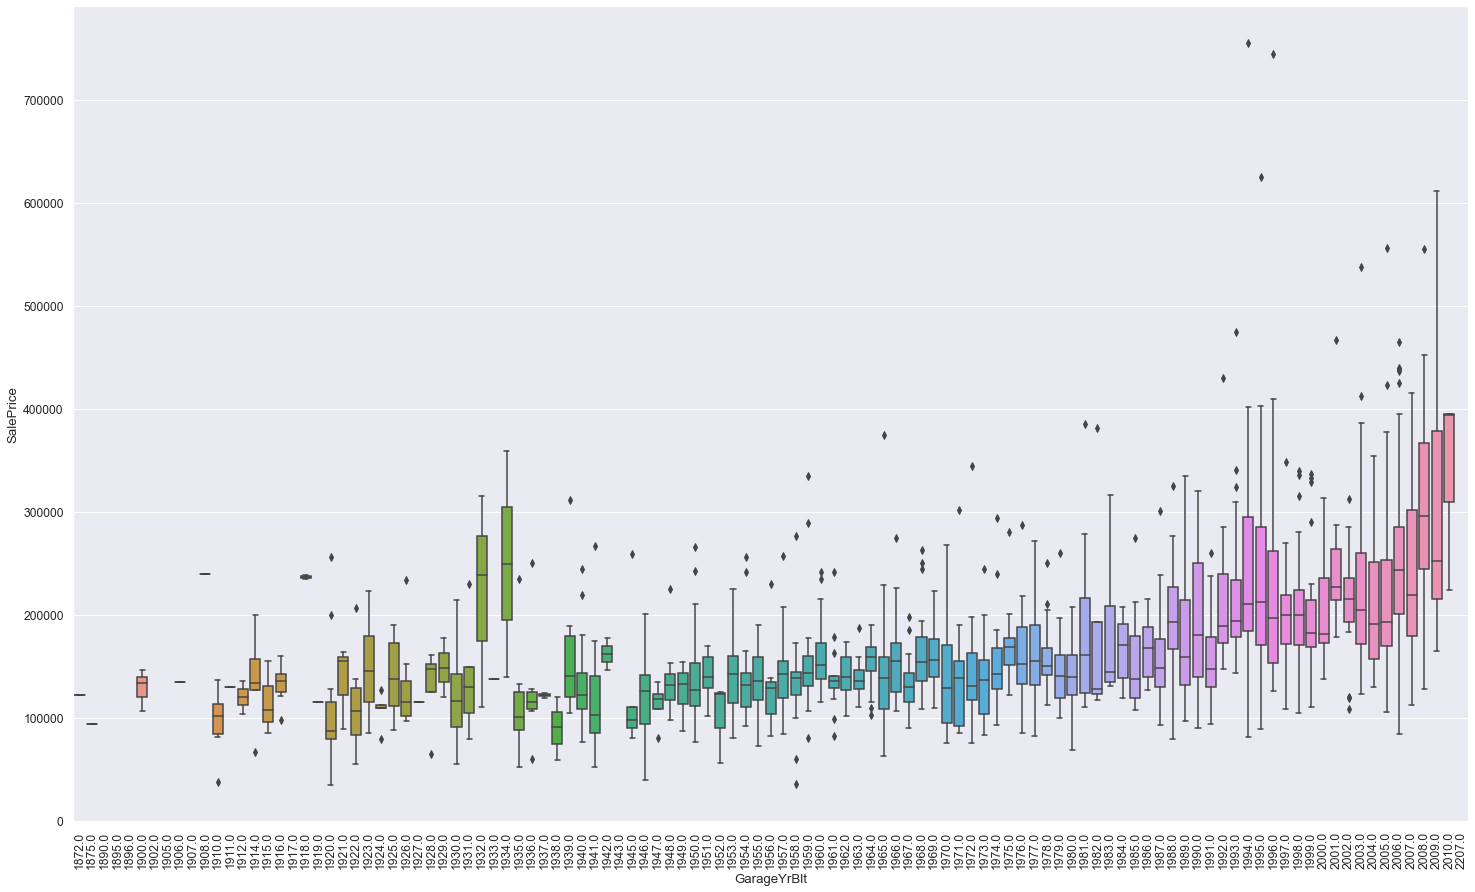

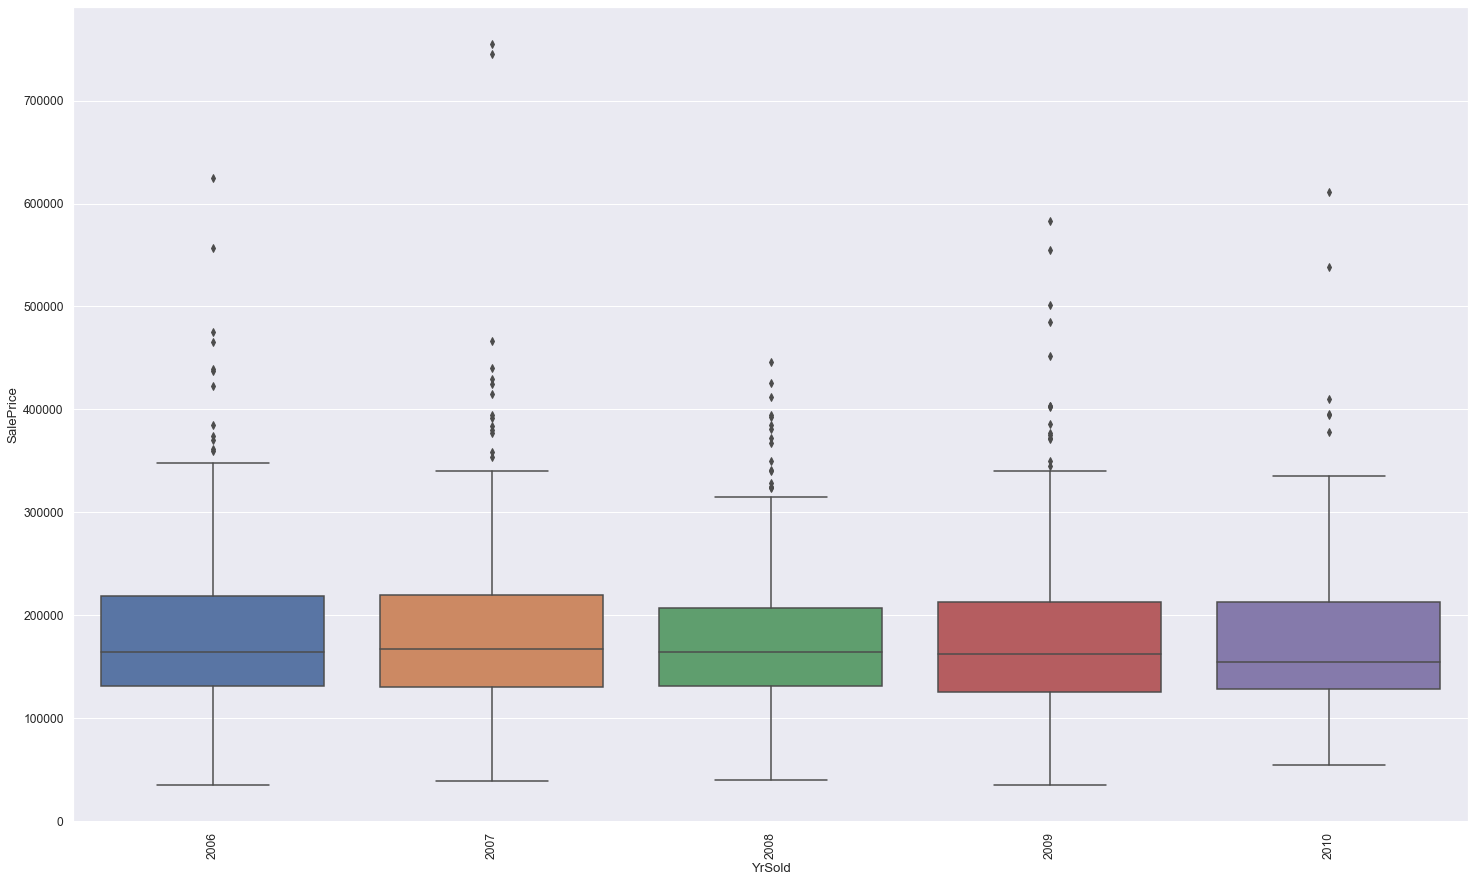

In [122]:
for i in ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]:
    plt.figure(figsize = (25,15))
    p = sns.boxplot(x = i, y = "SalePrice", data = df)
    for item in p.get_xticklabels():
        item.set_rotation(90)

In [123]:
df2.YearRemodAdd = np.where(df2.YearBuilt > df2.YearRemodAdd, df2.YearBuilt, df2.YearRemodAdd)
df2.YrSold = np.where(df2.YearBuilt > df2.YrSold, df2.YearBuilt, df2.YrSold)
df2.YrSold = np.where(df2.YearRemodAdd > df2.YrSold, df2.YearRemodAdd, df2.YrSold)

df2["Restoration"] = df2.YearRemodAdd - df2.YearBuilt
df2["HouseAge"] = df2.YrSold - df2.YearBuilt
df2["RestorationAge"] = df2.YrSold - df2.YearRemodAdd
df2["GarageAge"] = df2.GarageYrBlt - df2.YearBuilt
df2["GarageRestorationAge"] = np.abs(df2.GarageYrBlt - df2.YearRemodAdd)
df2["GarageSold"] = df2.YrSold - df2.GarageYrBlt

df2.GarageYrBlt = np.where(df2.GarageAge < 0, df2.YearBuilt, df2.GarageYrBlt)
df2.GarageYrBlt = np.where((df2.GarageYrBlt == 2207), df2.YearBuilt, df2.GarageYrBlt)
df2["GarageAge"] = df2.GarageYrBlt - df2.YearBuilt
df2["GarageSold"] = df2.YrSold - df2.GarageYrBlt


df2["Remodeled"] = np.where(df2.YearBuilt == df2.YearRemodAdd, 0 ,1)
df2["IsNewHouse"] = np.where(df2.YearBuilt == df2.YrSold, 1 ,0)



# YearBuiltCut
df2["YearBuiltCut"] = pd.cut(df2.YearBuilt, 15, labels = np.arange(1,16,1))
df2["GarageYearBuiltCut"] = pd.cut(df2.YearBuilt, 15, labels = np.arange(1,16,1))
df2["RemodAddCut"] = pd.cut(df2.YearRemodAdd, 10, labels = np.arange(1, 11, 1))

# Great Depression 1929-1939
df2["GreatDepression"] = np.where((df2.YearBuilt >=1929) & (df2.YearBuilt <= 1939), 1,0)
df2["BeforeGreatDepression"] = np.where((df2.YearBuilt <1929), 1,0)
# Mortgage Crisis
df2["Mortgage"] = np.where((df2.YearBuilt >=2007) & (df2.YearBuilt <= 2010), 1,0)
df2["MortgageRestoration"] = np.where((df2.YearRemodAdd >=2007) & (df2.YearRemodAdd <= 2010), 1,0)


for i in ["GreatDepression","BeforeGreatDepression", "Mortgage","MortgageRestoration"]:
    print(df2.groupby(i).SalePrice.agg(["count", "median"]), "\n")
    
    
df2.drop(["YearBuilt", "GarageYrBlt", "YearRemodAdd"], axis = 1, inplace = True)    

                 count    median
GreatDepression                 
0                 1402 165000.00
1                   58 127750.00 

                       count    median
BeforeGreatDepression                 
0                       1279 171000.00
1                        181 120000.00 

          count    median
Mortgage                 
0          1369 158000.00
1            91 253293.00 

                     count    median
MortgageRestoration                 
0                     1315 157900.00
1                      145 230000.00 



In [124]:
cat_eda(df2[set(df2.columns).difference(ordinal_vars)], cat_length=17)

RoofStyle : 6 Unique Category - object
         COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
Flat        20   0.01      185000.00            13    62522.96
Gable     2310   0.79      160000.00          1141    66331.24
Gambrel     22   0.01      139000.00            11    67013.53
Hip        551   0.19      176500.00           286   111549.60
Mansard     11   0.00      175000.00             7    58057.62
Shed         5   0.00      225000.00             2    49497.47


GreatDepression : 2 Unique Category - int32
   COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
0   2802   0.96      165000.00          1402    79481.47
1    117   0.04      127750.00            58    70021.01


HouseStyle : 8 Unique Category - object
        COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
1.5Fin    314   0.11      132000.00           154    54277.94
1.5Unf     19   0.01      111250.00            14    19036.47
1Story   1471   0.50      154750.00           726    77055.72
2.5Fin      8

In [125]:
ngb =df2.groupby("Neighborhood").SalePrice.median().reset_index()
ngb["Neighborhood_Clusters"] = pd.cut(df2.groupby("Neighborhood").SalePrice.median().values, 6, labels = np.arange(1,7,1))
df2 = pd.merge(df2, ngb.drop(["SalePrice"], axis = 1), how = "left", on = "Neighborhood").drop("Neighborhood", axis = 1)
df2["Neighborhood_Clusters"] = np.where(df2.Neighborhood_Clusters > 4, 5, df2.Neighborhood_Clusters)

del ngb

# Conditions
df2["Railroad"] = np.where((df2.Condition1.isin(["RRNn", "RRAn", "RRNe", "RRAe"])) | (df2.Condition2.isin(["RRNn", "RRAn", "RRNe", "RRAe"])), 1, 0)
df2["Park"] = np.where((df2.Condition1.isin(["PosN", "PosA"])) | (df2.Condition2.isin(["PosN", "PosA"])), 1, 0)
df2["Adjacent"] = np.where((df2.Condition1.isin(["PosA", "Artery", "Feedr", "RRAn", "RRAe"])) | (df2.Condition2.isin(["PosA", "Artery", "Feedr", "RRAn", "RRAe"])), 1, 0)
df2["Within"] = np.where((df2.Condition1.isin(["RRNn", "PosN", "RRNe"])) | (df2.Condition2.isin(["RRNn", "PosN", "RRNe"])), 1, 0)
df2["Norm"] = np.where((df2.Condition1.isin(["Norm"])) | (df2.Condition2.isin(["Norm"])), 1, 0)
df2["NorthSouth"] = np.where((df2.Condition1.isin(["RRNn", "RRAn"])) | (df2.Condition2.isin(["RRNn", "RRAn"])), 1, 0)
df2["EastWest"] = np.where((df2.Condition1.isin(["RRNe", "RRAe"])) | (df2.Condition2.isin(["RRNe", "RRAe"])), 1, 0)
df2["Road"] = np.where((df2.Condition1.isin(["Artery", "Feedr"])) | (df2.Condition2.isin(["Artery", "Feedr"])), 1, 0)

# Exterior
df2["Exterior1st"] = np.where((df2["Exterior1st"].isin(["Brk Cmn", "BrkComm"])) | (df2["Exterior2nd"].isin(["Brk Cmn", "BrkComm"])), "BrkComm",df2["Exterior1st"])
df2["Exterior2nd"] = np.where((df2["Exterior1st"].isin(["Brk Cmn", "BrkComm"])) | (df2["Exterior2nd"].isin(["Brk Cmn", "BrkComm"])), "BrkComm",df2["Exterior2nd"])
df2["Exterior1st"] = np.where((df2["Exterior1st"].isin(["CemntBd", "CmentBd"])) | (df2["Exterior2nd"].isin(["CemntBd", "CmentBd"])), "CmentBd",df2["Exterior1st"])
df2["Exterior2nd"] = np.where((df2["Exterior1st"].isin(["CemntBd", "CmentBd"])) | (df2["Exterior2nd"].isin(["CemntBd", "CmentBd"])), "CmentBd",df2["Exterior2nd"])
df2["Exterior1st"] = np.where((df2["Exterior1st"].isin(["Wd Shng", "WdShing"])) | (df2["Exterior2nd"].isin(["Wd Shng", "WdShing"])), "WdShing",df2["Exterior1st"])
df2["Exterior2nd"] = np.where((df2["Exterior1st"].isin(["Wd Shng", "WdShing"])) | (df2["Exterior2nd"].isin(["Wd Shng", "WdShing"])), "WdShing",df2["Exterior2nd"])

df2["SameExterior"] = np.where(df2.Exterior1st == df2.Exterior2nd, 1, 0)

ex = pd.merge(pd.DataFrame({"COUNT": df2["Exterior1st"].value_counts(),
                            "RATIO": df2["Exterior1st"].value_counts() / len(df2),
                            "TARGET_MEDIAN": df2.groupby("Exterior1st")["SalePrice"].median(),
                            "TARGET_COUNT": df2.groupby("Exterior1st")["SalePrice"].count()}).reset_index(),
           pd.DataFrame({"COUNT": df2["Exterior2nd"].value_counts(),
                            "RATIO2": df2["Exterior2nd"].value_counts() / len(df2),
                            "TARGET_MEDIAN2": df2.groupby("Exterior2nd")["SalePrice"].median(),
                            "TARGET_COUNT2": df2.groupby("Exterior2nd")["SalePrice"].count()}).reset_index(),
           how = "outer", on = "index").sort_values("index")
ex["ExteriorRank"] = pd.cut(ex.TARGET_MEDIAN, 4, labels = np.arange(1, 5, 1))
ex["ExteriorRank"] = np.where(ex["index"] == "Other", 4, ex["ExteriorRank"])

df2 = pd.merge(df2, ex[["index", "ExteriorRank"]].rename({"index":"Exterior1st", "ExteriorRank":"ExteriorRank1"}, axis = 1), how = "left", on = "Exterior1st")
df2 = pd.merge(df2, ex[["index", "ExteriorRank"]].rename({"index":"Exterior2nd", "ExteriorRank":"ExteriorRank2"}, axis = 1), how = "left", on = "Exterior2nd")
df2["TotalExteriorRank"] = df2["ExteriorRank1"]+df2["ExteriorRank2"]

del ex

# Heating
df2["Heating"] = np.where(df2.Heating.str.contains("Gas"), 1, 0)  

# MSZoning
df2["MSZoning_IsResidential"] = np.where(df2.MSZoning.isin(["RH", "RM", "RL"]), 1, 0)

# Sale Type
df2["SaleType_Cat"] = np.where(df2.SaleType.isin(["Con", "ConLD", "ConLI", "ConLw"]), "Con", df2.SaleType)
df2["SaleType_Cat"] = np.where(df2.SaleType.isin(["WD", "CWD", "VWD"]), "War", df2.SaleType_Cat)
df2["SaleType_Cat"] = np.where(df2.SaleType.isin(["COD"]), "Oth", df2.SaleType_Cat)

# MasVnrType
df2["MasVnrType"] = np.where(df2.MasVnrType.isin(["BrkCmn", "BrkFace"]), "Brk", df2.MasVnrType)
df2["HasMasVnr"] = np.where(df2.MasVnrType == "None", 0, 1)

# RoofMatl
df2["RoofMatl"] = np.where(df2.RoofMatl.isin(["CompShg"]), 1, 0)

df2["Foundation"] = np.where(df2["Foundation"] == "Stone", "BrkTil", df2["Foundation"])
df2["Foundation"] = np.where(df2["Foundation"] == "Wood", "PConc", df2["Foundation"])

# MSSubClass
df2["MSSubClass"] = np.where(df2.MSSubClass.isin([150]), 120, df2.MSSubClass)
df2["MSSubClass_AllAges"] = np.where(df2.MSSubClass.isin([40,45,50,75,90,150, 190]), 1, 0)
df2["MSSubClass_Newer"] = np.where(df2.MSSubClass.isin([20, 60, 120, 160]), 1, 0)
df2["MSSubClass_Older"] = np.where(df2.MSSubClass.isin([30, 70]), 1, 0)
df2["MSSubClass_AllStyles"] = np.where(df2.MSSubClass.isin([20, 90, 190]), 1, 0)
df2["MSSubClass_Pud"] = np.where(df2.MSSubClass.isin([150, 160, 180]), 1, 0)
df2["MSSubClass_SplitMultiLevel"] = np.where(df2.MSSubClass.isin([80,85, 180]), 1, 0)
df2["MSSubClass_1946"] = np.where(df2.MSSubClass.isin([20, 60, 120, 160]), 1, 0)
df2["MSSubClass_1945"] = np.where(df2.MSSubClass.isin([30, 70]), 1, 0)


# Building Type
df2["BldgType_Short"] = np.where(df2.BldgType.isin(['1Fam', '2fmCon']), "Fam", df2.BldgType)
df2["BldgType_Short"] = np.where(df2.BldgType.isin(['TwnhsE', 'Twnhs']), "Twnhs", df2.BldgType_Short)

# House Style
df2["HouseStyle_Floor"] = np.where(df2.HouseStyle.isin(["1Story"]), "1", "2")
df2["HouseStyle_Floor"] = np.where(df2.HouseStyle.isin(["1.5Fin", "1.5Unf"]), "1.5", df2["HouseStyle_Floor"])
df2["HouseStyle_Floor"] = np.where(df2.HouseStyle.isin(["2.5Fin", "2.5Unf"]), "2.5", df2["HouseStyle_Floor"])
df2["HouseStyle_Floor"] = np.where(df2.HouseStyle.isin(["SLvl", "SFoyer"]), "S", df2["HouseStyle_Floor"])

df2["HouseStyle_IsSplit"] = np.where(df2.HouseStyle.isin(["SLvl","SFoyer"]),1,0)


df2.drop(["MSSubClass", "Exterior1st", "Exterior2nd", "Condition1", "Condition2", "SaleType", "YrSold", "MoSold"], axis = 1, inplace = True)

In [126]:
cat_eda(df2[set(df2.columns).difference(ordinal_vars)], cat_length=17)

RoofStyle : 6 Unique Category - object
         COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
Flat        20   0.01      185000.00            13    62522.96
Gable     2310   0.79      160000.00          1141    66331.24
Gambrel     22   0.01      139000.00            11    67013.53
Hip        551   0.19      176500.00           286   111549.60
Mansard     11   0.00      175000.00             7    58057.62
Shed         5   0.00      225000.00             2    49497.47


HouseStyle : 8 Unique Category - object
        COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
1.5Fin    314   0.11      132000.00           154    54277.94
1.5Unf     19   0.01      111250.00            14    19036.47
1Story   1471   0.50      154750.00           726    77055.72
2.5Fin      8   0.00      194000.00             8   118211.98
2.5Unf     24   0.01      133900.00            11    63934.13
2Story    872   0.30      190000.00           445    87339.21
SFoyer     83   0.03      135960.00         

#### 9) Label & One-Hat Encoder

In [127]:
def label_encoder(dataframe):
    from sklearn import preprocessing
    labelencoder = preprocessing.LabelEncoder()

    label_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"
                  and len(dataframe[col].value_counts()) == 2]

    for col in label_cols:
        dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe

df2 = label_encoder(df2)




cat_cols = [col for col in df2.columns if df2[col].dtypes == 'O']

def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=nan_as_category, drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns


df2, new_cols_ohe = one_hot_encoder(df2, cat_cols, nan_as_category=False)

df2.shape

(2919, 183)

#### 10) LightGBM

In [128]:
df2.head()

,Id,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,SalePrice,TotalQual,TotalGarageQual,Overall,Exter,ExtraQual,Qual,Cond,TotalFlrSF,TotalBsmtFin,BsmtFinRatio,Basement,PorchArea,TotalHouseArea,TotalSqFeet,BsmtRoom,Floor,TotalFullBath,TotalHalfBath,TotalBath,GarageAreaRatio,LotRatio,RatioArea,GarageLotRatio,MasVnrRatio,DifArea,LowQualFinSFRatio,OverallGrade,GarageGrade,ExterGrade,KitchenScore,FireplaceScore,HasMasVnrType,BoughtOffPlan,Restoration,HouseAge,RestorationAge,GarageAge,GarageRestorationAge,GarageSold,Remodeled,IsNewHouse,YearBuiltCut,GarageYearBuiltCut,RemodAddCut,GreatDepression,BeforeGreatDepression,Mortgage,MortgageRestoration,Neighborhood_Clusters,Railroad,Park,Adjacent,Within,Norm,NorthSouth,EastWest,Road,SameExterior,ExteriorRank1,ExteriorRank2,TotalExteriorRank,MSZoning_IsResidential,HasMasVnr,MSSubClass_AllAges,MSSubClass_Newer,MSSubClass_Older,MSSubClass_AllStyles,MSSubClass_Pud,MSSubClass_SplitMultiLevel,MSSubClass_1946,MSSubClass_1945,HouseStyle_IsSplit,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_Cat_New,SaleType_Cat_Oth,SaleType_Cat_War,BldgType_Short_Fam,BldgType_Short_Twnhs,HouseStyle_Floor_1.5,HouseStyle_Floor_2,HouseStyle_Floor_2.5,HouseStyle_Floor_S
0,1,65.00,8450,nan,7,5,1,196.00,nan,1,0.00,nan,nan,nan,706.00,nan,0.00,150.00,856.00,1,nan,1,nan,856,854,0,1710,1.00,0.00,2,1,3,1,nan,8,0,0,nan,2.00,548.00,nan,nan,0,61,0,0,0,nan,0,208500.00,12.00,0.00,12,0.00,0.00,7.00,5.00,1710,706.00,0.82,1,61,2566.00,2566.00,1.00,2,3.00,1.00,3.50,274.00,0.20,0.30,0.06,0.08,6985.00,0.00,35,nan,nan,nan,nan,1,0,0,5,5,0.00,0.00,5.00,0,0,15,15,9,0,0,0,0,3,0,0,0,0,1,0,0,0,1,3.00,3.00,6.00,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
1,2,80.00,9600,nan,6,6,1,0.00,nan,1,0.00,nan,nan,nan,978.00,nan,0.00,284.00,1262.00,1,nan,1,nan,1262,0,0,1262,0.00,1.00,2,0,3,1,nan,6,0,1,nan,2.00,460.00,nan,nan,298,0,0,0,0,nan,0,181500.00,14.00,0.00,14,0.00,0.00,6.00,8.00,1262,978.00,0.77,1,298,2524.00,2524.00,1.00,1,2.00,1.00,2.50,230.00,0.13,0.26,0.05,0.00,7282.00,0.00,36,nan,nan,nan,nan,0,0,0,31,31,0.00,0.00,31.00,0,0,12,12,5,0,0,0,0,4,0,0,1,0,1,0,0,1,1,1.00,1.00,2.00,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,3,68.00,11250,nan,7,5,1,162.00,nan,1,0.00,nan,nan,nan,486.00,nan,0.00,434.00,920.00,1,nan,1,nan,920,866,0,1786,1.00,0.00,2,1,3,1,nan,6,0,1,nan,2.00,608.00,nan,nan,0,42,0,0,0,nan,0,223500.00,12.00,0.00,12,0.00,0.00,7.00,5.00,1786,486.00,0.53,1,42,2706.00,2706.00,1.00,2,3.00,1.00,3.50,304.00,0.16,0.24,0.05,0.06,9680.00,0.00,35,nan,nan,nan,nan,1,0,1,7,6,0.00,1.00,7.00,1,0,15,15,9

In [148]:
### TRAIN - TEST
train_model = df2[df2.Id.isin(train.Id)]
test_model = df2[df2.Id.isin(test.Id)]
test_model.drop("SalePrice", axis = 1, inplace = True)


X = train_model.drop(['SalePrice', "Id"], axis=1)

y = train_model[["SalePrice"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)



######### MODEL: LGBM
import lightgbm as lgb
lgb_param = {
    # Configuration
    "nthread": -1,
    "objective": "regression",
    "metric": "rmse",
    "verbose": -1,
}

reg = lgb.LGBMRegressor(
    random_state=46, **lgb_param
)
reg.fit(X_train,y_train, 
        eval_set=[(X_train, y_train),(X_test, y_test)],
        eval_metric = ["rmse", "mae"],
        eval_names=["Train", "Valid"],
        early_stopping_rounds=10,
        verbose=10,
        categorical_feature='auto')

print("")
print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, reg.predict(X_train)))))
print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))), "\n")
    
print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, reg.predict(X_train))))
print("Valid MAE:", "{:,.2f}".format(mean_absolute_error(y_test, reg.predict(X_test))), "\n")
print("Train MAPE:", "{:,.2f}".format(mean_absolute_percentage_error(y_train, reg.predict(X_train))))
print("Valid MAPE:", "{:,.2f}".format(mean_absolute_percentage_error(y_test, reg.predict(X_test))), "\n")
print("Train R^2:", "{:,.2f}".format(r2_score(y_train, reg.predict(X_train))))
print("Valid R^2:", "{:,.2f}".format(r2_score(y_test, reg.predict(X_test))))

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 10 rounds
[10]	Train's l1: 24262.8	Train's rmse: 37231.8	Valid's l1: 25812	Valid's rmse: 40117.8
[20]	Train's l1: 13848	Train's rmse: 24186.2	Valid's l1: 17477.5	Valid's rmse: 28249.2
[30]	Train's l1: 10340	Train's rmse: 19644.3	Valid's l1: 15917.2	Valid's rmse: 24915.8
[40]	Train's l1: 8842.33	Train's rmse: 17441.3	Valid's l1: 15657.1	Valid's rmse: 23730.4
[50]	Train's l1: 7848.43	Train's rmse: 15860.4	Valid's l1: 15738.2	Valid's rmse: 23450.8
Early stopping, best iteration is:
[40]	Train's l1: 8842.33	Train's rmse: 17441.3	Valid's l1: 15657.1	Valid's rmse: 23730.4

Train RMSE: 17,441.29
Train RMSE: 23,730.44 

Train MAE: 8,842.33
Valid MAE: 15,657.12 

Train MAPE: 48.74
Valid MAPE: 47.51 

Train R^2: 0.95
Valid R^2: 0.91


In [149]:
lgb_param = {
    # Configuration
    "nthread": -1,
    "objective": "regression",
    "metric": "rmse",
    "verbose": -1,
}

reg = lgb.LGBMRegressor(
    random_state=46, **lgb_param
)
reg.fit(X,y)


print("Train RMSE:","{:,.2f}".format(np.sqrt(mean_squared_error(y, reg.predict(X)))))
print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y, reg.predict(X))), "\n")

print("CV RMSE:", "{:,.2f}".format(np.sqrt(-cross_val_score(reg, X, y, cv=10, scoring="neg_mean_squared_error")).mean()))
print("CV MAE:", "{:,.2f}".format(-cross_val_score(reg, X, y, cv=10, scoring="neg_mean_absolute_error").mean()))

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
Train RMSE: 10,436.26
Train MAE: 5,558.28 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with

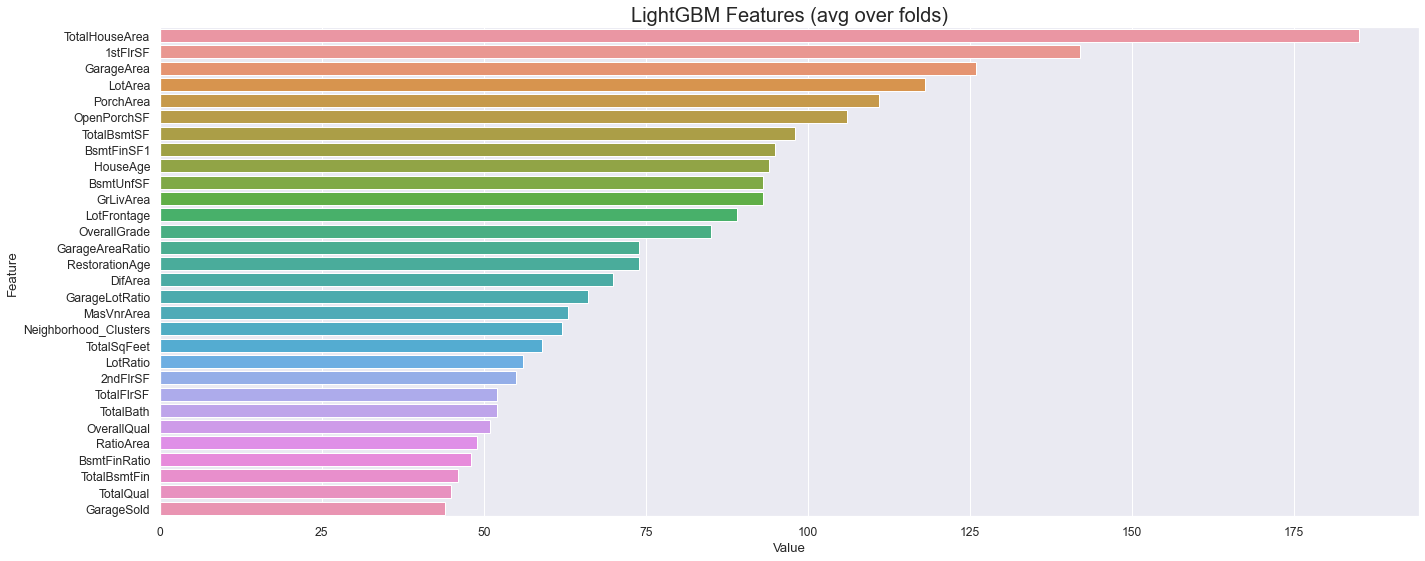

In [150]:
def plotImp(model, X , num = 30, figsize=(20, 8)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=figsize)

    p = sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                                      ascending=False)[0:num])
    p.axes.set_title('LightGBM Features (avg over folds)',fontsize=20)
    plt.tight_layout()
    #plt.savefig('lgbm_importances-01.png')
    plt.show()
    
plotImp(reg, X)